# **Project Title**
## Exploratory Data Analysis (EDA) on Mental Health in the Tech Industry

##### **Project Type**    - EDA - Explaratory Data Analysis
##### **Contribution**    - Individual- Sanjay Dasu


# **Project Summary -**

## **Project Overview**

The **Mental Health in Tech** project is a data-driven exploratory analysis
focused on understanding mental health awareness, challenges, and workplace
attitudes within the technology industry. The analysis is based on the
**Mental Health in Tech Survey (2014)**, which includes responses from
professionals working in tech organizations across different regions.

As the technology sector continues to grow rapidly, employees often face
high pressure, long working hours, and intense competition. Mental well-being
has therefore become an important factor influencing productivity, job
satisfaction, and employee retention, yet it is frequently under-discussed
in professional environments. This project uses data analysis techniques to
identify meaningful patterns and insights that can support better workplace
mental health initiatives.

## **Objective of the Project**

The primary objective of this project is to examine how mental health issues
are perceived, managed, and supported within tech workplaces. The analysis
aims to explore patterns related to mental health treatment, availability of
employer-provided benefits, openness in discussing mental health concerns,
and the potential consequences employees fear when disclosing such issues.

Additionally, the project compares organizational attitudes toward **mental
health versus physical health**, helping to highlight existing gaps in
awareness, support systems, and workplace policies.


# **GitHub Link -**

https://github.com/Sanju2511/Explaratory-Data-Analysis-of-Mental_Health_Tech_survey

# **Problem Statement**


## **Problem Statement**

The technology industry is widely recognized for its fast-paced work culture,
high expectations, and constant innovation. While these factors drive growth
and efficiency, they also place significant mental and emotional pressure on
employees. Issues such as stress, anxiety, and depression are increasingly
common among professionals in the tech sector, yet mental health continues to
be a sensitive and often overlooked topic in many workplaces.

Many employees hesitate to discuss mental health concerns or seek professional
help due to fear of stigma, lack of organizational support, or concerns about
negative career consequences. As a result, mental health challenges often go
unreported and untreated.

Organizations also struggle to understand how workplace factors—such as
company size, remote work culture, availability of mental health benefits,
wellness programs, and confidentiality policies—impact employee well-being
and openness. Additionally, it remains unclear whether mental health is given
the same importance as physical health within organizations.

The lack of clear, data-driven insights makes it difficult for management and
HR teams to develop effective mental health policies and support systems. This
project aims to address these gaps through exploratory data analysis.


## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import required libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warning messages for cleaner output
import warnings
warnings.simplefilter("ignore")


In [2]:
# Load the Mental Health in Tech survey dataset
survey_df = pd.read_csv("survey.csv")


In [3]:
# Display the first few records of the dataset
survey_df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
# Check the number of rows and columns in the dataset
survey_df.shape


(1259, 27)

In [5]:
# Display a concise summary of the dataset structure
survey_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

#### Duplicate Values

In [6]:
# Check the number of duplicate rows in the dataset
survey_df.duplicated().sum()


np.int64(0)

#### Missing Values/Null Values

In [7]:
# Check for missing values in each column
survey_df.isnull().sum()


,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [8]:
# Display columns with missing values along with their percentage
total_rows = survey_df.shape[0]

for col in survey_df.columns:
    missing_count = survey_df[col].isna().sum()
    if missing_count > 0:
        missing_percent = round((missing_count / total_rows) * 100, 2)
        print(f"Column '{col}' has {missing_count} missing values ({missing_percent}%).")


Column 'state' has 515 missing values (40.91%).
Column 'self_employed' has 18 missing values (1.43%).
Column 'work_interfere' has 264 missing values (20.97%).
Column 'comments' has 1095 missing values (86.97%).


### What did you know about your dataset?

## **Dataset Description**

The dataset used in this project is based on the **Mental Health in Tech Survey
(2014)** and contains responses from **1,259 professionals** working in the
technology industry. It consists of **27 columns**, each capturing different
aspects of an employee’s background, work environment, and mental health
experience.

The dataset includes information related to:
- Demographic characteristics of respondents
- Employment and organizational details
- Personal mental health history
- Availability of workplace mental health benefits
- Openness in discussing mental health issues
- Perceived consequences of disclosing mental health conditions at work

Overall, this dataset provides valuable insights into **mental health
awareness, stigma, and organizational support systems** within tech
workplaces, making it suitable for exploratory data analysis aimed at
understanding employee well-being and workplace culture.


## ***2. Understanding Your Variables***

## **Column Description**

The dataset consists of multiple variables that capture demographic details,
workplace characteristics, mental health history, and organizational support
related to mental well-being in the technology industry. The key columns are
described below:

- **Timestamp** – Date and time when the survey response was submitted  
- **Age** – Age of the respondent at the time of the survey  
- **Gender** – Self-identified gender of the respondent  
- **Country** – Country in which the respondent resides  
- **state** – U.S. state or territory (applicable only for respondents from the United States)  
- **self_employed** – Indicates whether the respondent is self-employed or employed by an organization  
- **family_history** – Shows whether the respondent has a family history of mental illness  
- **treatment** – Indicates whether the respondent has sought treatment for a mental health condition  
- **work_interfere** – Represents whether mental health affects the respondent’s work performance  
- **no_employees** – Size of the organization based on the number of employees  
- **remote_work** – Indicates whether the respondent works remotely at least 50% of the time  
- **tech_company** – Specifies whether the employer is primarily a technology-focused organization  
- **benefits** – Indicates availability of employer-provided mental health benefits  
- **care_options** – Shows awareness of mental health care options offered by the employer  
- **wellness_program** – Indicates whether mental health is discussed in workplace wellness programs  
- **seek_help** – Specifies whether the employer provides resources for mental health support  
- **anonymity** – Indicates whether anonymity is protected when using mental health resources  
- **leave** – Describes the ease of taking medical leave for mental health reasons  
- **mental_health_consequence** – Perceived negative consequences of discussing mental health at work  
- **phys_health_consequence** – Perceived negative consequences of discussing physical health at work  
- **coworkers** – Willingness to discuss mental health issues with coworkers  
- **supervisor** – Willingness to discuss mental health issues with supervisors  
- **mental_health_interview** – Likelihood of discussing mental health with a potential employer  
- **phys_health_interview** – Likelihood of discussing physical health with a potential employer  
- **mental_vs_physical** – Perception of whether mental health is treated equally to physical health  
- **obs_consequence** – Observed or heard negative consequences for coworkers with mental health issues  
- **comments** – Additional open-ended responses related to mental health experiences at work  

These variables collectively help analyze **mental health awareness,
stigma, workplace policies, and employee openness** within the technology
industry.


In [9]:
# Generate summary statistics for numerical columns
survey_df.describe()


,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


### Variables Description

From the descriptive statistics, it can be observed that the **Age** column
contains **negative values**, which are not logically valid. Since age cannot
be negative, these values indicate the presence of incorrect or invalid data
entries that need to be addressed during the data cleaning process.


### Check Unique Values for each variable.

In [10]:
# Display the number of unique values in each column
for column in survey_df.columns:
    unique_count = survey_df[column].nunique()
    print(f"{column} has {unique_count} unique values")


Timestamp has 1246 unique values
Age has 53 unique values
Gender has 49 unique values
Country has 48 unique values
state has 45 unique values
self_employed has 2 unique values
family_history has 2 unique values
treatment has 2 unique values
work_interfere has 4 unique values
no_employees has 6 unique values
remote_work has 2 unique values
tech_company has 2 unique values
benefits has 3 unique values
care_options has 3 unique values
wellness_program has 3 unique values
seek_help has 3 unique values
anonymity has 3 unique values
leave has 5 unique values
mental_health_consequence has 3 unique values
phys_health_consequence has 3 unique values
coworkers has 3 unique values
supervisor has 3 unique values
mental_health_interview has 3 unique values
phys_health_interview has 3 unique values
mental_vs_physical has 3 unique values
obs_consequence has 2 unique values
comments has 160 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Remove records with invalid (negative or zero) age values
survey_df = survey_df[survey_df["Age"] > 0]

# Check dataset shape after cleaning the Age column
survey_df.shape


(1256, 27)

In [12]:
# Drop the 'comments' column due to a high percentage of missing values
survey_df = survey_df.drop(columns=["comments"])

# Check dataset shape after removing the column
survey_df.shape


(1256, 26)

In [13]:
# Identify the top 10 most frequent states to handle missing state values
top_states = (
    survey_df["state"]
    .value_counts()
    .sort_values(ascending=False)
    .head(10)
)

top_states


,count
state,
CA,138
WA,70
NY,57
TN,45
TX,44
OH,30
IL,29
PA,29
OR,29


In [14]:
# Examine the distribution of values in the self_employed column
survey_df["self_employed"].value_counts()


,count
self_employed,
No,1093
Yes,145


In [15]:
# Analyze the distribution of values in the work_interfere column
survey_df["work_interfere"].value_counts()


,count
work_interfere,
Sometimes,464
Never,213
Rarely,173
Often,143


In [16]:
# Fill missing categorical values using the most frequent category
# - Country: most common country
# - self_employed: most common response
# - work_interfere: most common response

from sklearn.impute import SimpleImputer

freq_imputer = SimpleImputer(strategy="most_frequent")

survey_df[["Country", "self_employed", "work_interfere"]] = freq_imputer.fit_transform(
    survey_df[["Country", "self_employed", "work_interfere"]]
)


In [17]:
# Verify if any missing values remain in the dataset
survey_df.isnull().sum()


,0
Timestamp,0
Age,0
Gender,0
Country,0
state,514
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0


In [18]:
# Separate numerical and categorical features for further analysis
numeric_cols = [col for col in survey_df.columns if survey_df[col].dtype != "object"]
categorical_cols = [col for col in survey_df.columns if survey_df[col].dtype == "object"]

numeric_cols, categorical_cols


(['Age'],
 ['Timestamp',
  'Gender',
  'Country',
  'state',
  'self_employed',
  'family_history',
  'treatment',
  'work_interfere',
  'no_employees',
  'remote_work',
  'tech_company',
  'benefits',
  'care_options',
  'wellness_program',
  'seek_help',
  'anonymity',
  'leave',
  'mental_health_consequence',
  'phys_health_consequence',
  'coworkers',
  'supervisor',
  'mental_health_interview',
  'phys_health_interview',
  'mental_vs_physical',
  'obs_consequence'])

### What all manipulations have you done and insights you found?

## **Data Cleaning Summary and Insights**

At this stage, all remaining missing values in the dataset have been handled
appropriately. Missing entries in the **state**, **self_employed**, and
**work_interfere** columns were filled using their respective **most frequent
values**, identified by analyzing the distribution of each feature.

Additionally, invalid records containing **negative age values** were removed
to ensure logical consistency in the dataset.

### **Key Insights from Data Cleaning**

- **"CA" (California)** is the most frequently occurring state in the dataset,
  indicating a high number of respondents from this region.
- A majority of respondents are **not self-employed**, suggesting that most
  individuals work for organizations rather than independently.
- Most respondents report that their mental health **sometimes affects their
  work performance**, highlighting the intermittent impact of mental health
  challenges in the tech workplace.

With these cleaning steps completed, the dataset is now consistent and ready
for further exploratory analysis and visualization.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

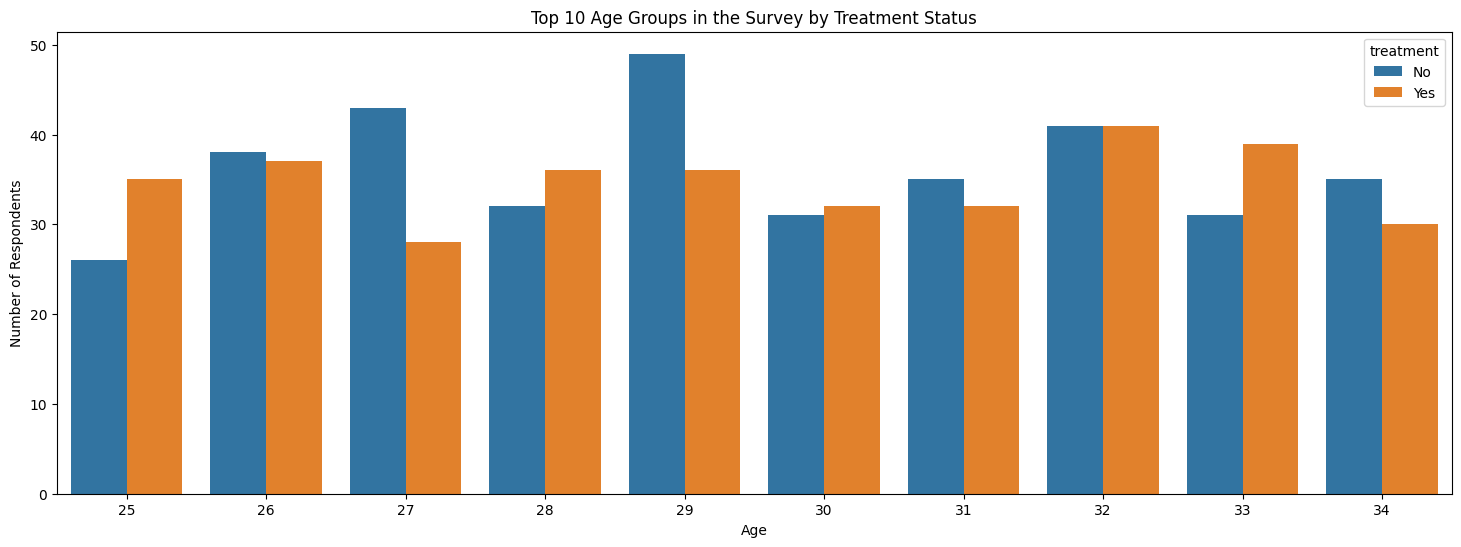

In [19]:
# Visualize the top 10 most common ages among survey respondents
plt.figure(figsize=(18, 6))

top_ages = survey_df["Age"].value_counts().head(10).index
age_subset = survey_df[survey_df["Age"].isin(top_ages)]

sns.countplot(
    data=age_subset,
    x="Age",
    hue="treatment"
)

plt.title("Top 10 Age Groups in the Survey by Treatment Status")
plt.xlabel("Age")
plt.ylabel("Number of Respondents")
plt.show()


##### 1. Why did you pick the specific chart?

This analysis aims to examine the **age distribution** of respondents in the
Mental Health in Tech survey to understand which age groups are most
represented.


##### 2. What is/are the insight(s) found from the chart?

**Insights**

- The age group **29 years** has the highest number of respondents in the
  survey, making it the most dominant age group.
- Despite this, a large proportion of respondents across age groups have
  **not sought treatment** for their mental health conditions.
- Age groups **25, 28, 30, 32, and 33** show a relatively higher number of
  individuals who have reported seeking treatment, indicating greater mental
  health awareness or willingness to seek help within these age ranges.


##### 3. Will the insights gained help create a positive business impact?

Yes, the insights obtained from this analysis can contribute to meaningful
business and organizational impact.

- The results suggest that **younger individuals are more proactive in seeking
  mental health treatment** compared to older age groups.
- This understanding can help organizations and mental health service
  providers design **targeted support programs and treatment plans** that
  better align with the needs of younger professionals.
- To improve overall mental well-being across the workforce, organizations
  should focus on **increasing awareness and reducing stigma around mental
  health among older employees**, encouraging them to seek help when needed.

By using these insights, companies can develop more inclusive and effective
mental health policies that support employees across all age groups.


#### Chart - 2

In [21]:
# Extract year and month from the Timestamp column
survey_df["Timestamp"] = pd.to_datetime(survey_df["Timestamp"])

# Create new features for year and month
survey_df["year"] = survey_df["Timestamp"].dt.year
survey_df["month"] = survey_df["Timestamp"].dt.month

# Analyze response distribution by year
year_distribution = survey_df["year"].value_counts()

year_distribution, (year_distribution / survey_df.shape[0]) * 100


(year
 2014    1187
 2015      68
 2016       1
 Name: count, dtype: int64,
 year
 2014    94.506369
 2015     5.414013
 2016     0.079618
 Name: count, dtype: float64)

In [22]:
# Analyze the number of survey responses collected in each month for every year
monthly_responses = (
    survey_df
    .groupby("year")["month"]
    .value_counts()
)

monthly_responses


year  month
2014  8        1132
      9          47
      10          3
      11          3
      12          2
2015  2          47
      4           5
      5           5
      8           3
      7           2
      9           2
      11          2
      1           1
      6           1
2016  2           1
Name: count, dtype: int64

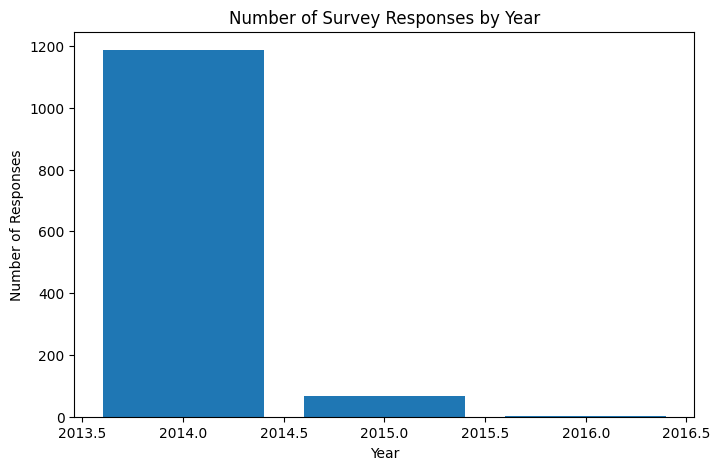

In [23]:
# Visualize the number of survey responses collected each year
plt.figure(figsize=(8, 5))
plt.bar(year_distribution.index, year_distribution.values)

plt.title("Number of Survey Responses by Year")
plt.xlabel("Year")
plt.ylabel("Number of Responses")
plt.show()


##### 1. Why did you pick the specific chart?

This chart is used to understand the **time span (tenure)** over which the
survey responses were collected and to observe the distribution of responses
across different years.


##### 2. What is/are the insight(s) found from the chart?

**Insights**

- The survey data is heavily dominated by responses from the year **2014**,
  which accounts for approximately **94.5%** of the total dataset.
- Most survey responses were collected during **August and September of 2014**
  and **February of 2015**, indicating peak participation during these months.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Insights**

- Since the majority of survey responses were recorded during the months of
  **August, September, and February**, organizations can expect higher survey
  participation during these periods.
- Companies can strategically plan and conduct surveys in these months to
  **maximize response rates and participant engagement**, leading to more
  reliable and representative data collection.


In [24]:
# Remove temporary year and month features derived from Timestamp
survey_df = survey_df.drop(columns=["year", "month"])


#### Chart - 3

In [25]:
# Analyze the distribution of gender responses in the survey
survey_df["Gender"].value_counts()


,count
Gender,
Male,614
male,205
Female,121
M,116
female,62
F,38
m,34
f,15
Make,4


In [26]:
# Standardize and clean the Gender column
survey_df["Gender"] = survey_df["Gender"].str.strip().str.lower()

# Map common variations to standard categories
survey_df.loc[
    survey_df["Gender"].str.contains(r"\b(male|man|guy|cis\s*male)\b", regex=True, na=False),
    "Gender"
] = "Male"

survey_df.loc[
    survey_df["Gender"].str.contains(r"\b(female|woman|cis\s*woman)\b", regex=True, na=False),
    "Gender"
] = "Female"

# Assign remaining values to 'Others'
survey_df["Gender"] = survey_df["Gender"].where(
    survey_df["Gender"].isin(["Male", "Female"]),
    "Others"
)


In [27]:
# View the distribution of values in the cleaned Gender column
survey_df["Gender"].value_counts()


,count
Gender,
Male,834
Others,226
Female,196


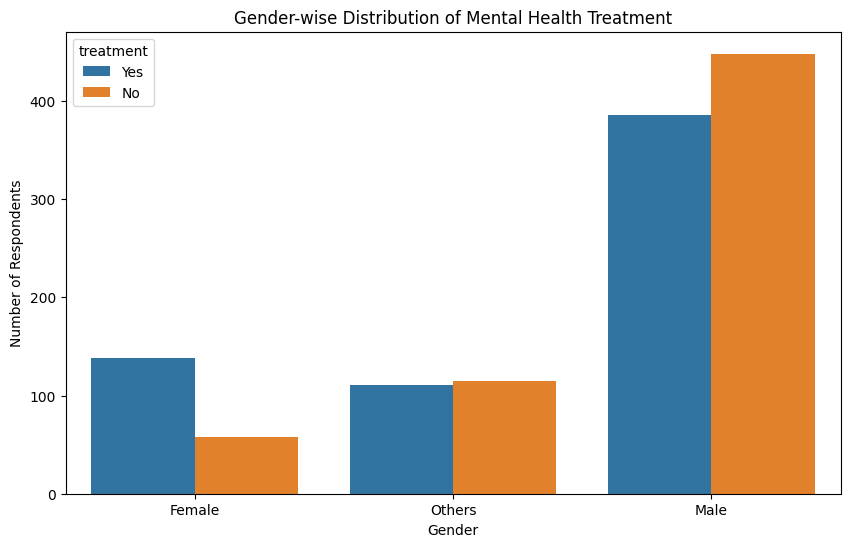

In [28]:
# Plot gender distribution with respect to mental health treatment
plt.figure(figsize=(10, 6))

sns.countplot(
    data=survey_df,
    x="Gender",
    hue="treatment"
)

plt.title("Gender-wise Distribution of Mental Health Treatment")
plt.xlabel("Gender")
plt.ylabel("Number of Respondents")
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze the **gender distribution** of survey
participants along with their **attitude toward mental health treatment**.
By comparing gender with treatment-seeking behavior, the visualization helps
identify differences in awareness, openness, and response patterns across
gender groups.


##### 2. What is/are the insight(s) found from the chart?

**Insights**

- **Male** respondents form the largest portion of the survey population.
  However, a comparatively lower number of males have reported seeking
  treatment for mental health conditions.
- **Female** respondents represent a smaller proportion of the survey
  participants compared to males.
- Respondents categorized under **Others** show a higher tendency to seek
  mental health treatment compared to those who reported not seeking
  treatment, indicating greater openness toward mental health care within
  this group.


##### 3. Will the gained insights help creating a positive business impact?

**Business Insights**

- The findings suggest that individuals categorized under the **Others**
  gender group show greater openness toward mental health treatment. This
  indicates an opportunity for organizations to design **targeted and
  inclusive mental health programs** that address the specific needs of this
  group.
- By spreading greater awareness and normalizing mental health treatment,
  companies can encourage more individuals to seek support. This can lead to
  **improved employee well-being**, increased trust, and long-term business
  growth through stronger engagement and wider adoption of mental health
  services.


#### Chart - 4

In [29]:
# Check the number of unique countries represented in the survey
survey_df["Country"].nunique()


48

In [30]:
# Identify the top 10 countries and states with the highest survey participation
top_countries = survey_df["Country"].value_counts().head(10)
top_states = survey_df["state"].value_counts().head(10)

# Create filtered datasets for visualization
country_subset = survey_df[survey_df["Country"].isin(top_countries.index)]
state_subset = survey_df[survey_df["state"].isin(top_states.index)]

# Display coverage percentage of top countries
top_countries, print(
    "Survey data covered by top 10 countries:",
    round((top_countries / survey_df.shape[0] * 100).sum(), 2), "%"
)


Survey data covered by top 10 countries: 92.04 %


(Country
 United States     749
 United Kingdom    184
 Canada             72
 Germany            45
 Netherlands        27
 Ireland            27
 Australia          21
 France             13
 India              10
 New Zealand         8
 Name: count, dtype: int64,
 None)

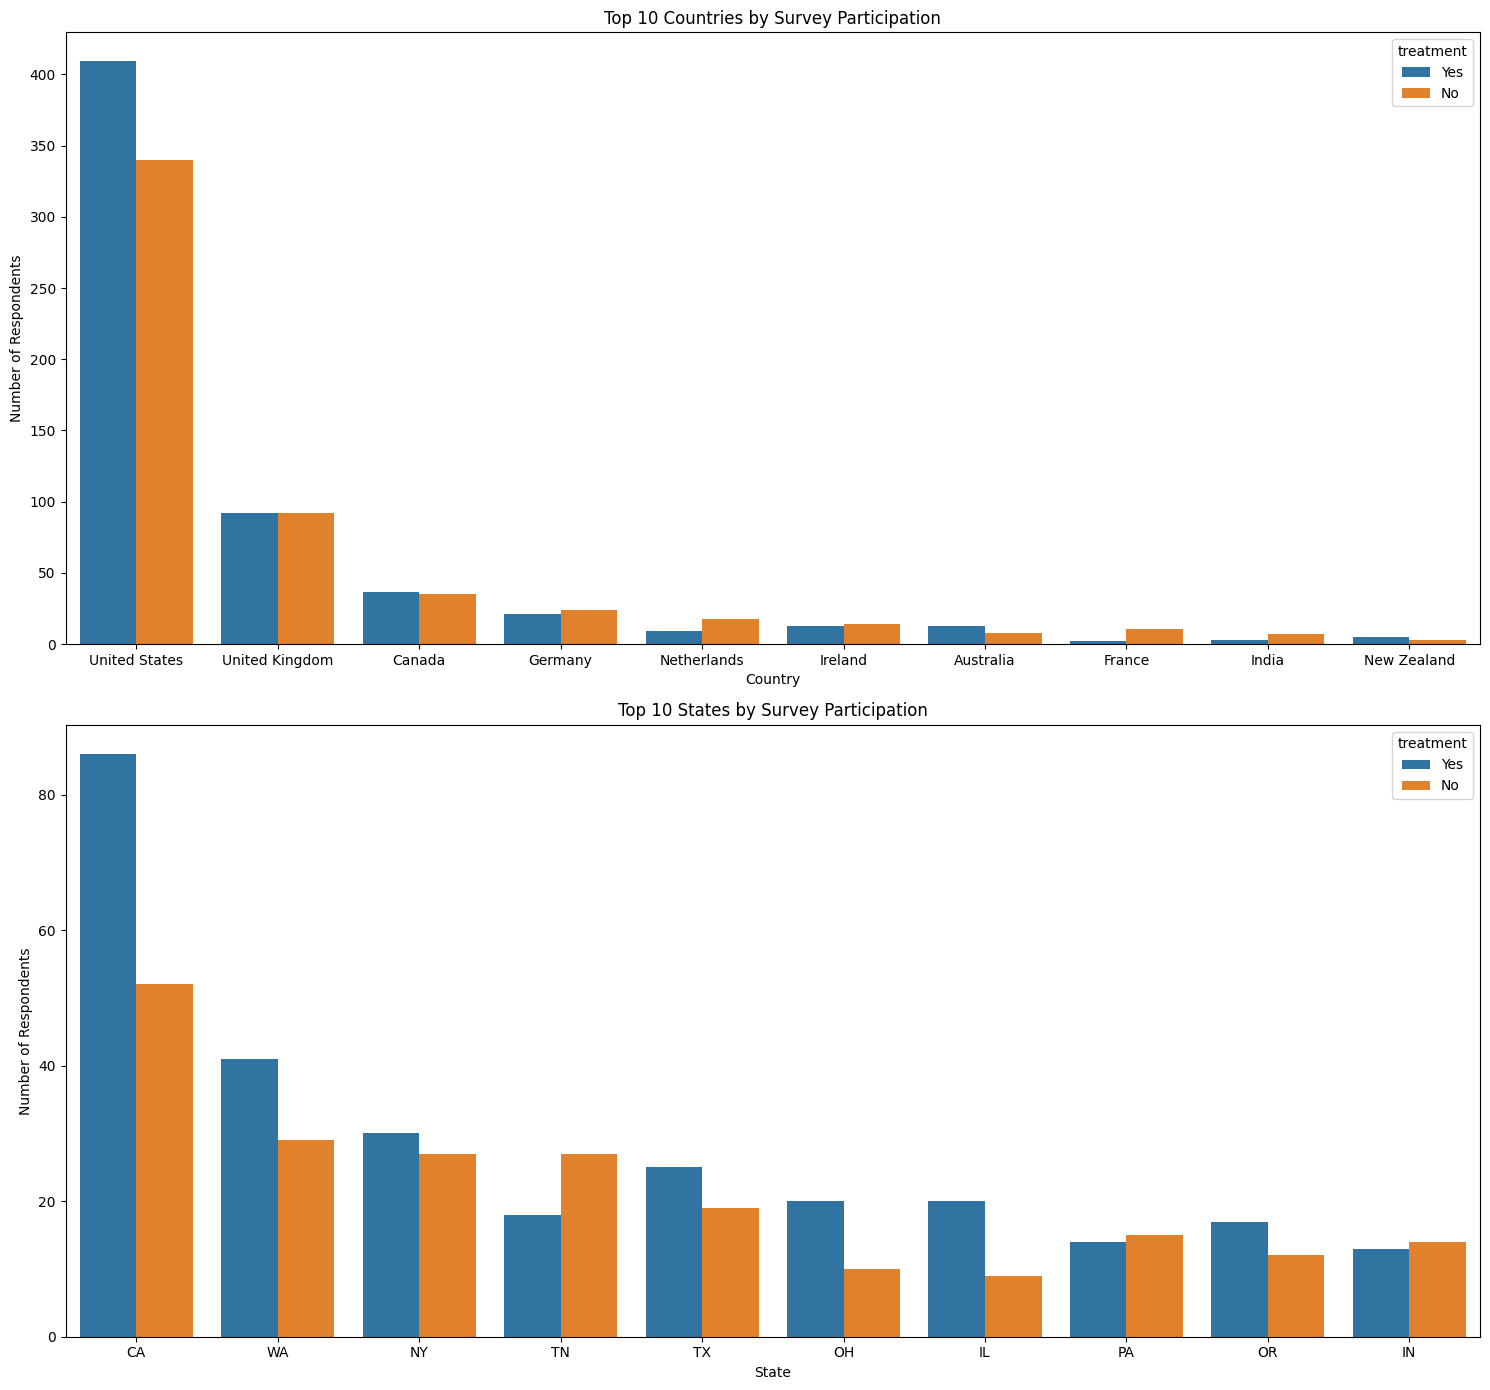

In [31]:
# Plot the top 10 countries and states with respect to mental health treatment
plt.figure(figsize=(15, 14))

# Top 10 Countries
plt.subplot(2, 1, 1)
sns.countplot(
    data=country_subset,
    x="Country",
    hue="treatment",
    order=top_countries.index
)
plt.title("Top 10 Countries by Survey Participation")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")

# Top 10 States
plt.subplot(2, 1, 2)
sns.countplot(
    data=state_subset,
    x="state",
    hue="treatment",
    order=top_states.index
)
plt.title("Top 10 States by Survey Participation")
plt.xlabel("State")
plt.ylabel("Number of Respondents")

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze the **top 10 dominating countries and
states** in the survey, as they collectively account for approximately
**92.03%** of the total responses. The visualization also helps examine their
**attitudes toward mental health treatment**, providing insights into regional
patterns in awareness and treatment-seeking behavior.


##### 2. What is/are the insight(s) found from the chart?

**Insights**

- The **United States** is the most dominant country in the survey; however,
  compared to other countries, a relatively lower proportion of respondents
  have sought treatment for mental health conditions.
- The **United Kingdom** shows one of the most positive attitudes toward mental
  health, with a majority of respondents reporting that they have sought
  treatment.
- Countries such as **Germany, Ireland, the Netherlands, France, and India**
  also demonstrate a strong positive attitude toward mental health, as a large
  proportion of respondents from these regions have sought treatment.
- **California (CA)** is the most dominant state among U.S. respondents, and
  a majority of individuals from this state have reported seeking treatment
  for mental health conditions.
- Overall, respondents from the **top 10 states** show a generally positive
  attitude toward mental health, with most indicating willingness to seek
  treatment when needed.


##### 3. Will the gained insights help creating a positive business impact?

**Business Insight**

Organizations can strategically target countries such as **Canada, the United
Kingdom, Germany, France, Ireland, the Netherlands, and India**, as these
regions show a higher proportion of respondents who are willing to seek
treatment for mental health conditions. Focusing mental health programs and
treatment plans in these countries can lead to better adoption, higher
engagement, and more effective mental health initiatives.


#### Chart - 5

In [32]:
# Analyze the distribution of self_employed responses
self_employed_counts = survey_df["self_employed"].value_counts()

self_employed_counts, (self_employed_counts / survey_df.shape[0]) * 100


(self_employed
 No     1111
 Yes     145
 Name: count, dtype: int64,
 self_employed
 No     88.455414
 Yes    11.544586
 Name: count, dtype: float64)

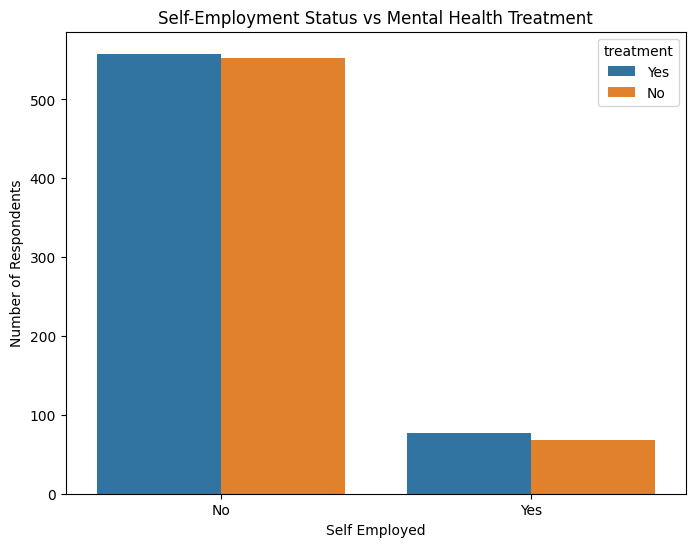

In [33]:
# Plot self-employment status with respect to mental health treatment
plt.figure(figsize=(8, 6))

sns.countplot(
    data=survey_df,
    x="self_employed",
    hue="treatment"
)

plt.title("Self-Employment Status vs Mental Health Treatment")
plt.xlabel("Self Employed")
plt.ylabel("Number of Respondents")
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze the relationship between **self-employment
status** and **mental health treatment-seeking behavior**. It helps compare
whether individuals who are self-employed differ from those working in
organizations in terms of their willingness to seek mental health treatment.


##### 2. What is/are the insight(s) found from the chart?

**Insights**

- Respondents who are **self-employed** form a smaller portion of the survey,
  and the majority of them have **not sought treatment** for mental health
  conditions.
- Respondents who are **not self-employed** make up a larger share of the
  dataset; however, most individuals in this group have also **not sought
  mental health treatment**.

These observations suggest that reluctance to seek mental health treatment is
present across both employment types.


##### 3. Will the gained insights help creating a positive business impact?

**Business Insights**

- The analysis indicates that **non self-employed individuals** show relatively
  greater engagement with mental health treatment compared to self-employed
  respondents. This suggests that companies can effectively **target non
  self-employed professionals with structured mental health treatment plans**.
- **Self-employed individuals**, on the other hand, may benefit more from
  **mental health awareness and education programs**. By increasing awareness
  and reducing stigma within this group, organizations can encourage healthier
  attitudes toward mental well-being and potentially expand their customer base
  in the mental health services sector.


#### Chart - 6

In [35]:
# Analyze the distribution of responses for the family_history feature
survey_df["family_history"].value_counts()


,count
family_history,
No,765
Yes,491


In [36]:
# Analyze the impact of family history on mental health treatment (percentage-wise)
family_treatment_distribution = (
    survey_df
    .groupby("family_history")["treatment"]
    .value_counts(normalize=True) * 100
)

family_treatment_distribution


family_history  treatment
No              No           64.575163
                Yes          35.424837
Yes             Yes          74.134420
                No           25.865580
Name: proportion, dtype: float64

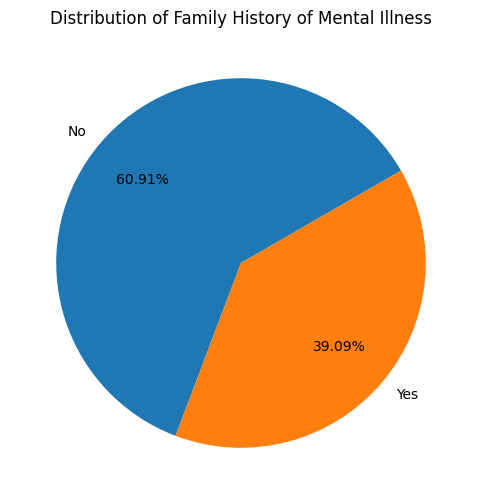

In [38]:
# Visualize the distribution of family history of mental illness
plt.figure(figsize=(6, 6))

plt.pie(
    survey_df["family_history"].value_counts(),
    labels=survey_df["family_history"].value_counts().index,
    autopct="%1.2f%%",
    startangle=30,
    pctdistance=0.7
)

plt.title("Distribution of Family History of Mental Illness")
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze the **family history of mental illness**
among survey respondents. It helps understand how having a family history of
mental health conditions is distributed across the dataset and provides
context for further analysis of its relationship with treatment-seeking
behavior.


##### 2. What is/are the insight(s) found from the chart?

**Insights**

- Approximately **60.91%** of respondents reported **no family history of
  mental illness**, and among them, about **21.57%** have sought mental health
  treatment.
- Around **39.09%** of respondents reported having a **family history of mental
  illness**; however, only **10.11%** of individuals in this group have sought
  treatment, which is notably lower compared to those without a family history.

These findings suggest that having a family history of mental illness does not
necessarily translate into a higher likelihood of seeking treatment, and may
highlight the role of stigma, awareness, or personal barriers in treatment
decisions.


##### 3. Will the gained insights help creating a positive business impact?


**Business Insights**

- The company can adopt a **reverse marketing strategy** by targeting
  individuals who **do not have a family history of mental illness**, as this
  group appears to be more proactive and willing to seek mental health
  treatment.
- For individuals with a **family history of mental illness**, organizations
  can focus on **awareness and education programs** aimed at reducing stigma,
  improving understanding, and encouraging a more positive approach toward
  seeking mental health support.

By applying these strategies, companies can increase outreach effectiveness
and promote healthier attitudes toward mental well-being across different
audience segments.


#### Chart - 7

In [39]:
# Analyze how mental health interferes with work performance (percentage distribution)
work_interfere_counts = survey_df["work_interfere"].value_counts()

work_interfere_counts, (work_interfere_counts / survey_df.shape[0]) * 100


(work_interfere
 Sometimes    727
 Never        213
 Rarely       173
 Often        143
 Name: count, dtype: int64,
 work_interfere
 Sometimes    57.882166
 Never        16.958599
 Rarely       13.773885
 Often        11.385350
 Name: count, dtype: float64)

In [40]:
# Analyze how mental health interferes with work performance (percentage distribution)
work_interfere_counts = survey_df["work_interfere"].value_counts()

work_interfere_counts, (work_interfere_counts / survey_df.shape[0]) * 100


(work_interfere
 Sometimes    727
 Never        213
 Rarely       173
 Often        143
 Name: count, dtype: int64,
 work_interfere
 Sometimes    57.882166
 Never        16.958599
 Rarely       13.773885
 Often        11.385350
 Name: count, dtype: float64)

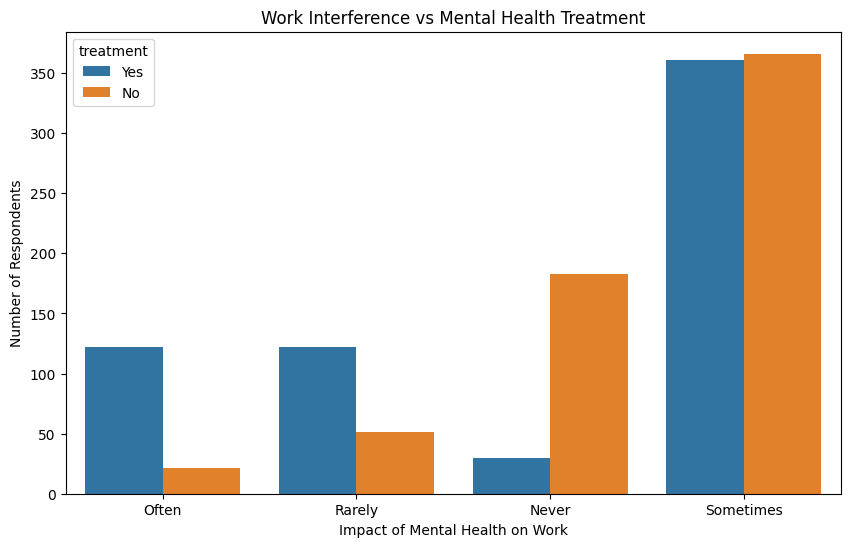

In [41]:
# Visualize the relationship between work interference and mental health treatment
plt.figure(figsize=(10, 6))

sns.countplot(
    data=survey_df,
    x="work_interfere",
    hue="treatment"
)

plt.title("Work Interference vs Mental Health Treatment")
plt.xlabel("Impact of Mental Health on Work")
plt.ylabel("Number of Respondents")
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze the **work_interfere** feature in relation to
the **mental health treatment** variable. Since work_interfere is a categorical
feature, the count plot helps compare how different levels of work
interference due to mental health are associated with treatment-seeking
behavior among respondents.


##### 2. What is/are the insight(s) found from the chart?

**Insights**

- Approximately **57.88%** of respondents reported that their mental health
  condition **sometimes** affects their work performance. Among this group,
  about **28.74%** have sought mental health treatment.
- Around **11.38%** of respondents indicated that their mental health condition
  **often** affects their work performance; however, only **9.71%** of them have
  sought treatment. This gap highlights a potential risk area, as frequent
  work interference without adequate treatment may negatively impact employee
  well-being, productivity, and overall organizational growth.

These findings suggest the need for proactive mental health support,
particularly for employees whose mental health frequently interferes with
their work.


##### 3. Will the gained insights help creating a positive business impact?


**Business Insight**

Organizations should implement targeted **mental health awareness and support
programs** for employees whose mental health conditions **sometimes interfere**
with their work performance. By encouraging early intervention and promoting
treatment-seeking behavior, companies can improve employee well-being,
enhance productivity, and support sustained organizational growth.


#### Chart - 8

In [42]:
# Analyze the distribution of company size (number of employees) in percentage
company_size_counts = survey_df["no_employees"].value_counts()

company_size_counts, (company_size_counts / survey_df.shape[0]) * 100


(no_employees
 6-25              290
 26-100            288
 More than 1000    281
 100-500           176
 1-5               161
 500-1000           60
 Name: count, dtype: int64,
 no_employees
 6-25              23.089172
 26-100            22.929936
 More than 1000    22.372611
 100-500           14.012739
 1-5               12.818471
 500-1000           4.777070
 Name: count, dtype: float64)

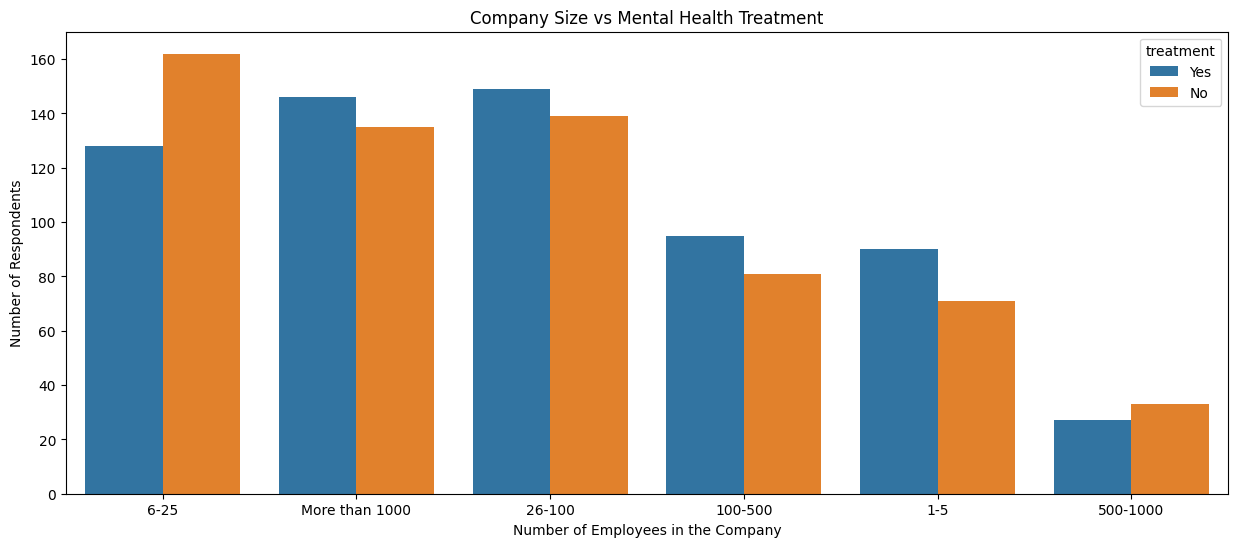

In [43]:
# Visualize company size (number of employees) with respect to mental health treatment
plt.figure(figsize=(15, 6))

sns.countplot(
    data=survey_df,
    x="no_employees",
    hue="treatment"
)

plt.title("Company Size vs Mental Health Treatment")
plt.xlabel("Number of Employees in the Company")
plt.ylabel("Number of Respondents")
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze the **no_employees** feature in relation to
the **mental health treatment** variable. Since company size is a categorical
feature, the count plot helps compare how employees from organizations of
different sizes differ in their treatment-seeking behavior and mental health
awareness.


##### 2. What is/are the insight(s) found from the chart?

**Insights**

- Companies with **6–25 employees** form the largest single group in the
  survey, accounting for approximately **23.08%** of the total responses.
  However, the proportion of employees seeking mental health treatment in
  these organizations remains relatively low.
- Organizations with **26–100 or more employees** represent another major
  segment of the dataset, contributing around **45.2%** of the total survey
  responses. In this group, the number of respondents who have sought mental
  health treatment is comparatively higher, suggesting better awareness or
  access to support in larger organizations.


##### 3. Will the gained insights help creating a positive business impact?

**Business Insight**

Organizations with a workforce size of **26–100 or more employees** appear to
demonstrate better mental health awareness and higher treatment-seeking
behavior. Companies within this size range can continue strengthening their
mental health initiatives to maintain employee well-being and productivity.

For organizations with **6–25 employees**, it is recommended to implement
focused **mental health awareness and support programs**. Encouraging openness
and access to mental health resources in smaller companies can help employees
become more health-oriented, increase treatment adoption, and ultimately
contribute to long-term organizational growth.


#### Chart - 9

In [44]:
# Analyze the distribution of remote work among respondents
remote_work_counts = survey_df["remote_work"].value_counts()

remote_work_counts, (remote_work_counts / survey_df.shape[0]) * 100


(remote_work
 No     882
 Yes    374
 Name: count, dtype: int64,
 remote_work
 No     70.22293
 Yes    29.77707
 Name: count, dtype: float64)

In [45]:
# Analyze the relationship between remote work and mental health treatment (percentage-wise)
remote_work_treatment = (
    survey_df
    .groupby("remote_work")["treatment"]
    .value_counts() / survey_df.shape[0] * 100
)

remote_work_treatment


remote_work  treatment
No           No           35.350318
             Yes          34.872611
Yes          Yes          15.684713
             No           14.092357
Name: count, dtype: float64

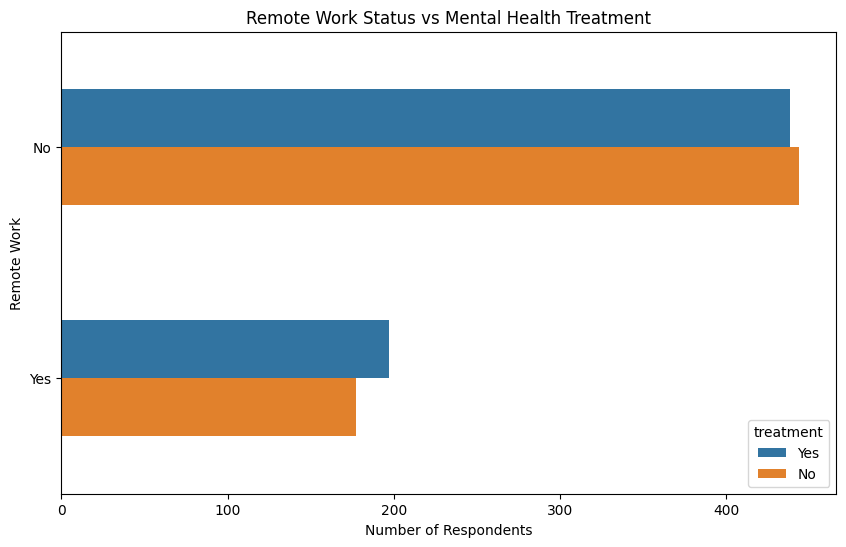

In [46]:
# Visualize the relationship between remote work status and mental health treatment
plt.figure(figsize=(10, 6))

sns.countplot(
    data=survey_df,
    y="remote_work",
    hue="treatment",
    width=0.5
)

plt.title("Remote Work Status vs Mental Health Treatment")
plt.xlabel("Number of Respondents")
plt.ylabel("Remote Work")
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze the relationship between the
**remote_work** feature and **mental health treatment-seeking behavior**.
Since remote_work is a categorical variable, the count plot allows for a clear
comparison of treatment patterns between employees who work remotely and
those who do not.


##### 2. What is/are the insight(s) found from the chart?

**Insights**

- Approximately **70.22%** of respondents do **not work remotely**, and among
  them, about **34.87%** have sought mental health treatment.
- Around **29.78%** of respondents work **remotely**, out of which
  **15.68%** have reported seeking mental health treatment.

These observations indicate that employees working in non-remote settings are
more likely to seek mental health treatment compared to those working
remotely, which may be influenced by workplace support systems, accessibility
to resources, or organizational culture.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Insight**

Organizations should promote a variety of **mental health treatment options**
and implement **awareness programs** for both remote and non-remote employees.
Providing equal support to all employees can encourage treatment-seeking
behavior, improve overall well-being, and ultimately contribute to increased
productivity and sustained company growth.


#### Chart - 10

In [47]:
# Analyze whether respondents are working in a tech company
survey_df["tech_company"].value_counts()


,count
tech_company,
Yes,1030
No,226


In [48]:
# Analyze the relationship between working in a tech company and mental health treatment
tech_company_treatment_counts = (
    survey_df
    .groupby("tech_company")["treatment"]
    .value_counts()
)

tech_company_treatment_percentage = (
    tech_company_treatment_counts / survey_df.shape[0] * 100
)

tech_company_treatment_counts, tech_company_treatment_percentage


(tech_company  treatment
 No            Yes          122
               No           104
 Yes           No           517
               Yes          513
 Name: count, dtype: int64,
 tech_company  treatment
 No            Yes           9.713376
               No            8.280255
 Yes           No           41.162420
               Yes          40.843949
 Name: count, dtype: float64)

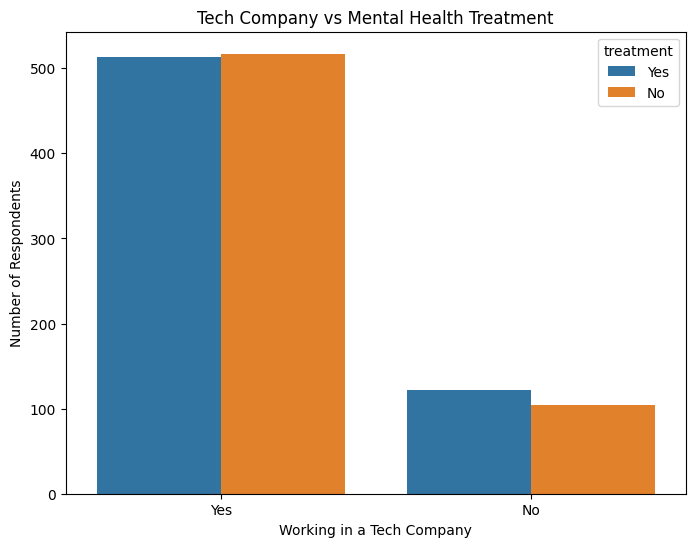

In [49]:
# Visualize tech company status with respect to mental health treatment
plt.figure(figsize=(8, 6))

sns.countplot(
    data=survey_df,
    x="tech_company",
    hue="treatment"
)

plt.title("Tech Company vs Mental Health Treatment")
plt.xlabel("Working in a Tech Company")
plt.ylabel("Number of Respondents")
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze the relationship between the
**tech_company** feature and **mental health treatment-seeking behavior**.
As tech_company is a categorical variable, the count plot allows for a clear
comparison of treatment patterns between employees working in technology-based
organizations and those working in non-technology organizations.


##### 2. What is/are the insight(s) found from the chart?

**Insights**

- A large majority of the survey respondents, approximately **82%**, are
  employed in **technology-based companies**, indicating strong representation
  from the tech industry.
- Among employees working in tech companies, about **41.16%** have **not sought
  mental health treatment**, suggesting a relatively lower willingness or
  openness toward addressing mental health concerns within these workplaces.
- Respondents working in **non-tech companies**, although accounting for only
  **18%** of the dataset, show a **more positive attitude toward mental health**,
  as a majority of them have reported seeking treatment.

These findings highlight potential differences in mental health awareness,
support, and workplace culture between tech and non-tech organizations.


##### 3. Will the gained insights help creating a positive business impact?

**Business Insight**

Technology-based companies should actively implement **mental health awareness
and support programs** for their employees. Encouraging openness and promoting
treatment-seeking behavior can improve employee well-being, enhance workplace
productivity, and foster a healthier organizational culture. In the long term,
such initiatives can contribute to sustained company growth while also
expanding opportunities for the mental health services industry.


#### Chart - 11

In [51]:
# Analyze availability of mental health benefits provided by companies
benefits_counts = survey_df["benefits"].value_counts()

benefits_counts, (benefits_counts / survey_df.shape[0]) * 100


(benefits
 Yes           475
 Don't know    408
 No            373
 Name: count, dtype: int64,
 benefits
 Yes           37.818471
 Don't know    32.484076
 No            29.697452
 Name: count, dtype: float64)

In [52]:
# Analyze the relationship between mental health benefits and treatment-seeking behavior (percentage-wise)
benefits_treatment_distribution = (
    survey_df
    .groupby("benefits")["treatment"]
    .value_counts() / survey_df.shape[0] * 100
)

benefits_treatment_distribution


benefits    treatment
Don't know  No           20.461783
            Yes          12.022293
No          No           15.366242
            Yes          14.331210
Yes         Yes          24.203822
            No           13.614650
Name: count, dtype: float64

In [53]:
# Analyze the relationship between mental health benefits and tech company status (percentage-wise)
benefits_tech_distribution = (
    survey_df
    .groupby("benefits")["tech_company"]
    .value_counts() / survey_df.shape[0] * 100
)

benefits_tech_distribution


benefits    tech_company
Don't know  Yes             26.671975
            No               5.812102
No          Yes             25.716561
            No               3.980892
Yes         Yes             29.617834
            No               8.200637
Name: count, dtype: float64

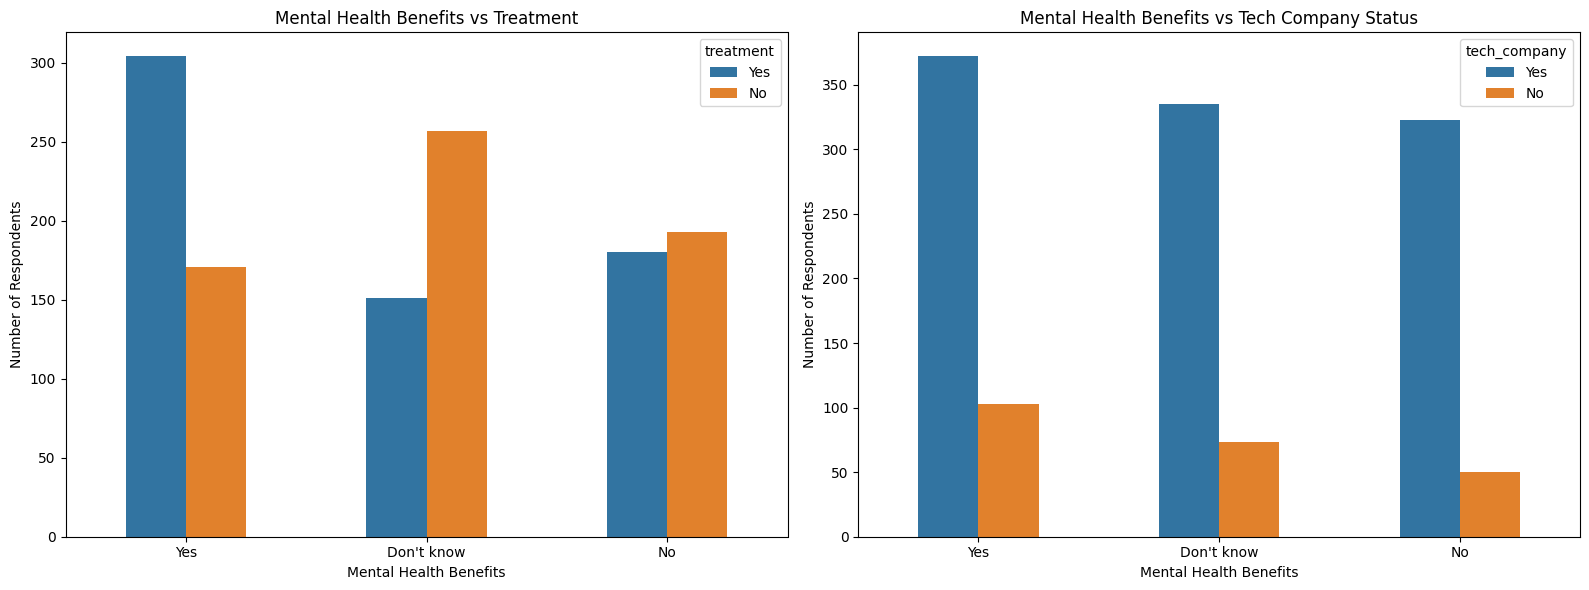

In [54]:
# Visualize mental health benefits with respect to treatment and tech company status
plt.figure(figsize=(16, 6))

# Benefits vs Treatment
plt.subplot(1, 2, 1)
sns.countplot(
    data=survey_df,
    x="benefits",
    hue="treatment",
    width=0.5
)
plt.title("Mental Health Benefits vs Treatment")
plt.xlabel("Mental Health Benefits")
plt.ylabel("Number of Respondents")

# Benefits vs Tech Company
plt.subplot(1, 2, 2)
sns.countplot(
    data=survey_df,
    x="benefits",
    hue="tech_company",
    width=0.5
)
plt.title("Mental Health Benefits vs Tech Company Status")
plt.xlabel("Mental Health Benefits")
plt.ylabel("Number of Respondents")

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This analysis focuses on the **benefits** feature to understand whether
organizations provide **mental health benefits** to their employees and to
examine whether employees are actually **utilizing these benefits** by seeking
mental health treatment.


##### 2. What is/are the insight(s) found from the chart?

**Insights**

- Approximately **32.48%** of respondents are **not aware** of whether their
  company provides mental health benefits. This may indicate a lack of
  transparency or ineffective communication regarding mental health resources
  within organizations. A significant portion of this group (**26.67%**) works
  in tech companies, suggesting that awareness gaps exist even in the tech
  sector.
- Despite being unaware of available benefits, about **12.02%** of respondents
  from this group have still sought mental health treatment, which reflects a
  positive and proactive attitude toward mental well-being.
- Around **29.69%** of respondents reported that their companies **do not offer
  mental health benefits**, which is a concerning observation. Among them,
  **25.71%** are employed in tech companies.
- Even without access to mental health benefits, approximately **14.33%** of
  respondents in this group have sought treatment, highlighting their
  willingness to prioritize mental health despite limited organizational
  support.
- About **37.81%** of respondents receive **mental health benefits** from their
  companies. Within this group, **24.02%** have sought mental health treatment,
  indicating that the availability of benefits positively influences
  treatment-seeking behavior. A majority of these respondents are employed in
  tech companies, which is a positive sign for mental health adoption in the
  industry.

Overall, these findings emphasize the importance of **clear communication,
accessibility, and promotion of mental health benefits** to improve employee
well-being and encourage effective utilization of available resources.


##### 3. Will the gained insights help creating a positive business impact?

**Business Insights**

- Companies should actively **increase awareness and communication** regarding
  the mental health benefits they provide so that employees are informed and
  encouraged to utilize available support resources.
- Organizations that currently **do not offer mental health benefits** should
  consider implementing such programs. Providing mental health support can
  improve employee well-being, enhance productivity, and contribute to
  long-term organizational growth.


#### Chart - 12

In [55]:
# Analyze awareness of mental health care options provided by employers
care_options_counts = survey_df["care_options"].value_counts()

care_options_counts, (care_options_counts / survey_df.shape[0]) * 100


(care_options
 No          499
 Yes         443
 Not sure    314
 Name: count, dtype: int64,
 care_options
 No          39.729299
 Yes         35.270701
 Not sure    25.000000
 Name: count, dtype: float64)

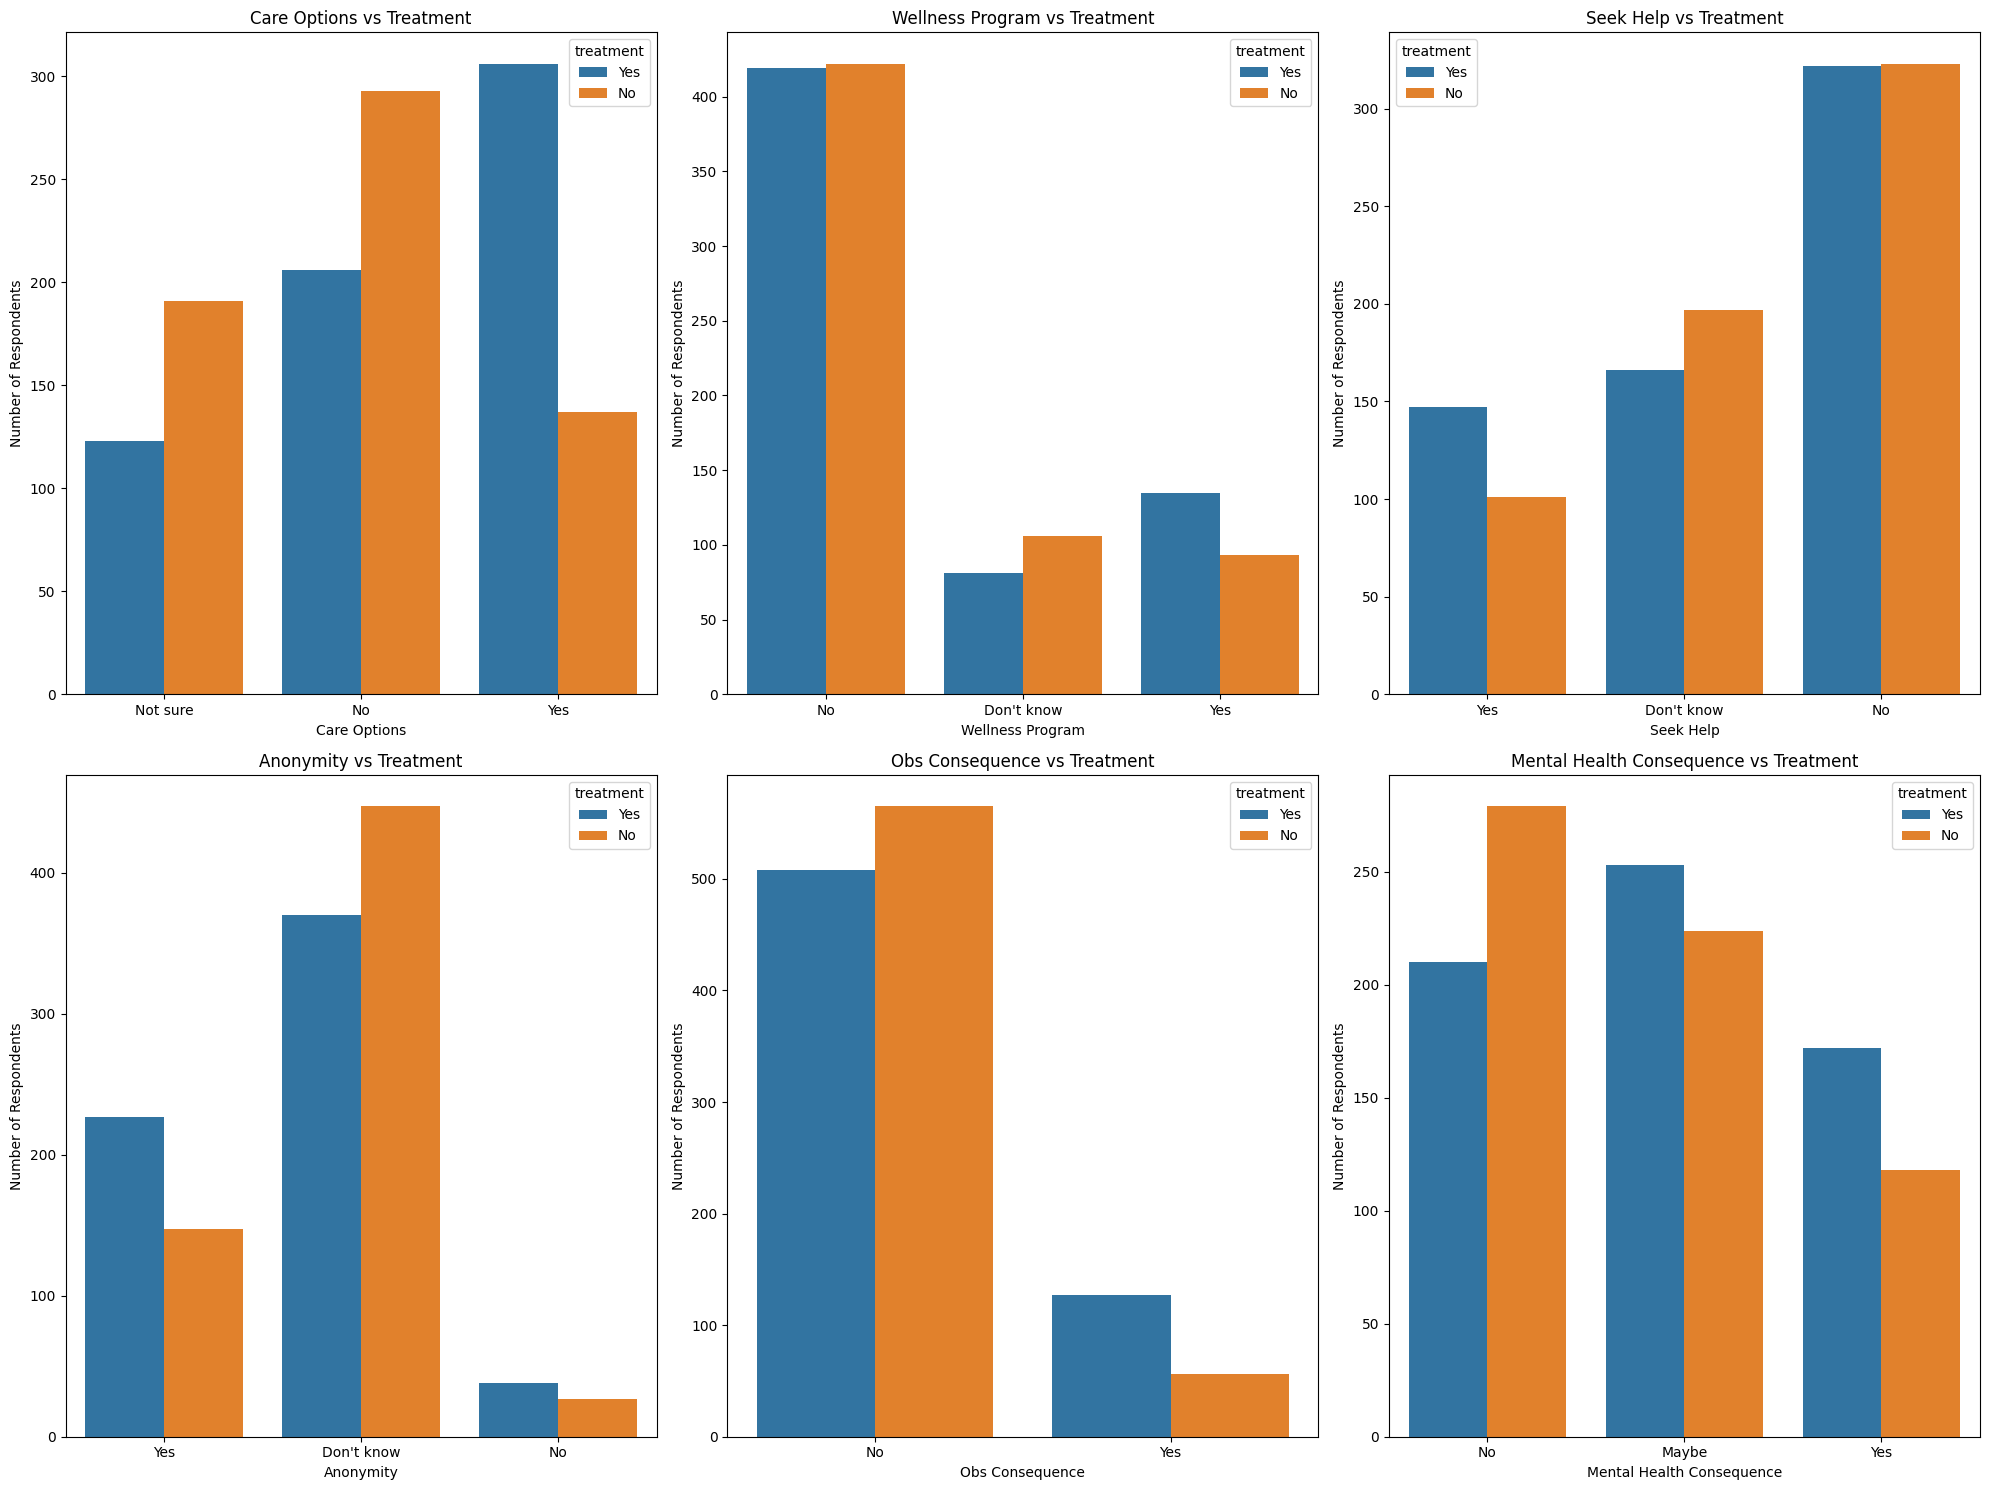

In [56]:
# Analyze the impact of workplace mental health policies and culture on treatment-seeking behavior
plt.figure(figsize=(20, 15))

features = [
    "care_options",
    "wellness_program",
    "seek_help",
    "anonymity",
    "obs_consequence",
    "mental_health_consequence"
]

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(
        data=survey_df,
        x=feature,
        hue="treatment"
    )
    plt.title(f"{feature.replace('_', ' ').title()} vs Treatment")
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel("Number of Respondents")

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze the relationship between key workplace
mental health factors—**care_options, wellness_program, seek_help, anonymity,
obs_consequence, and mental_health_consequence**—and respondents’ attitudes
toward mental health treatment. Since all these variables are categorical,
the count plots help compare how organizational support, awareness, and
perceived consequences influence employees’ willingness to seek mental health
care.


##### 2. What is/are the insight(s) found from the chart?

**Insights**

- A large proportion of respondents (**39.72%**) are **unaware of the mental
  health care options** provided by their organizations, indicating low
  awareness or poor communication regarding available mental health resources.
- About **35.27%** of respondents are **aware of the mental health care options**
  offered by their companies, and the **majority of individuals in this group
  have sought treatment**, which is a positive sign for both employee well-being
  and the mental health industry.
- Most respondents reported that **mental health is not discussed as part of
  employee wellness programs**, reflecting limited organizational focus on
  mental well-being, which is a concerning observation.
- A majority of respondents indicated that they are **not provided with
  sufficient resources** to learn about mental health or seek help, highlighting
  inadequate organizational support for mental health.
- Many respondents are **uncertain about the protection of their anonymity**
  while seeking mental health treatment, suggesting a lack of trust between
  employees and employers.
- Although most respondents have **not observed negative consequences** for
  coworkers with mental health conditions—indicating a generally healthy work
  environment—the proportion of employees who have actually sought treatment
  remains relatively low, which may negatively impact long-term organizational
  productivity.
- A significant number of respondents **believe or are unsure** whether
  discussing mental health issues at work could lead to negative consequences,
  reflecting a potentially unsupportive or cautious workplace culture.

Overall, these findings highlight the need for stronger mental health policies,
clear communication, trust-building measures, and proactive organizational
support to improve employee mental well-being and workplace performance.


##### 3. Will the gained insights help creating a positive business impact?

**Business Insights**

Companies should actively increase **awareness of mental health care options**
among employees who are **unsure** about the benefits provided to them. Clear
communication and regular awareness initiatives can help employees better
understand and utilize available mental health resources, supporting overall
organizational growth.

By improving awareness of mental health benefits, ensuring **confidentiality
and anonymity**, and integrating mental health discussions into employee
wellness programs, organizations can encourage **early treatment-seeking
behavior**, build employee trust, and reduce burnout.

These initiatives contribute to **higher productivity**, **lower absenteeism
and attrition**, improved employee engagement, and long-term cost savings—
ultimately fostering **sustainable business growth** and a healthier workplace
culture.


#### Chart - 13

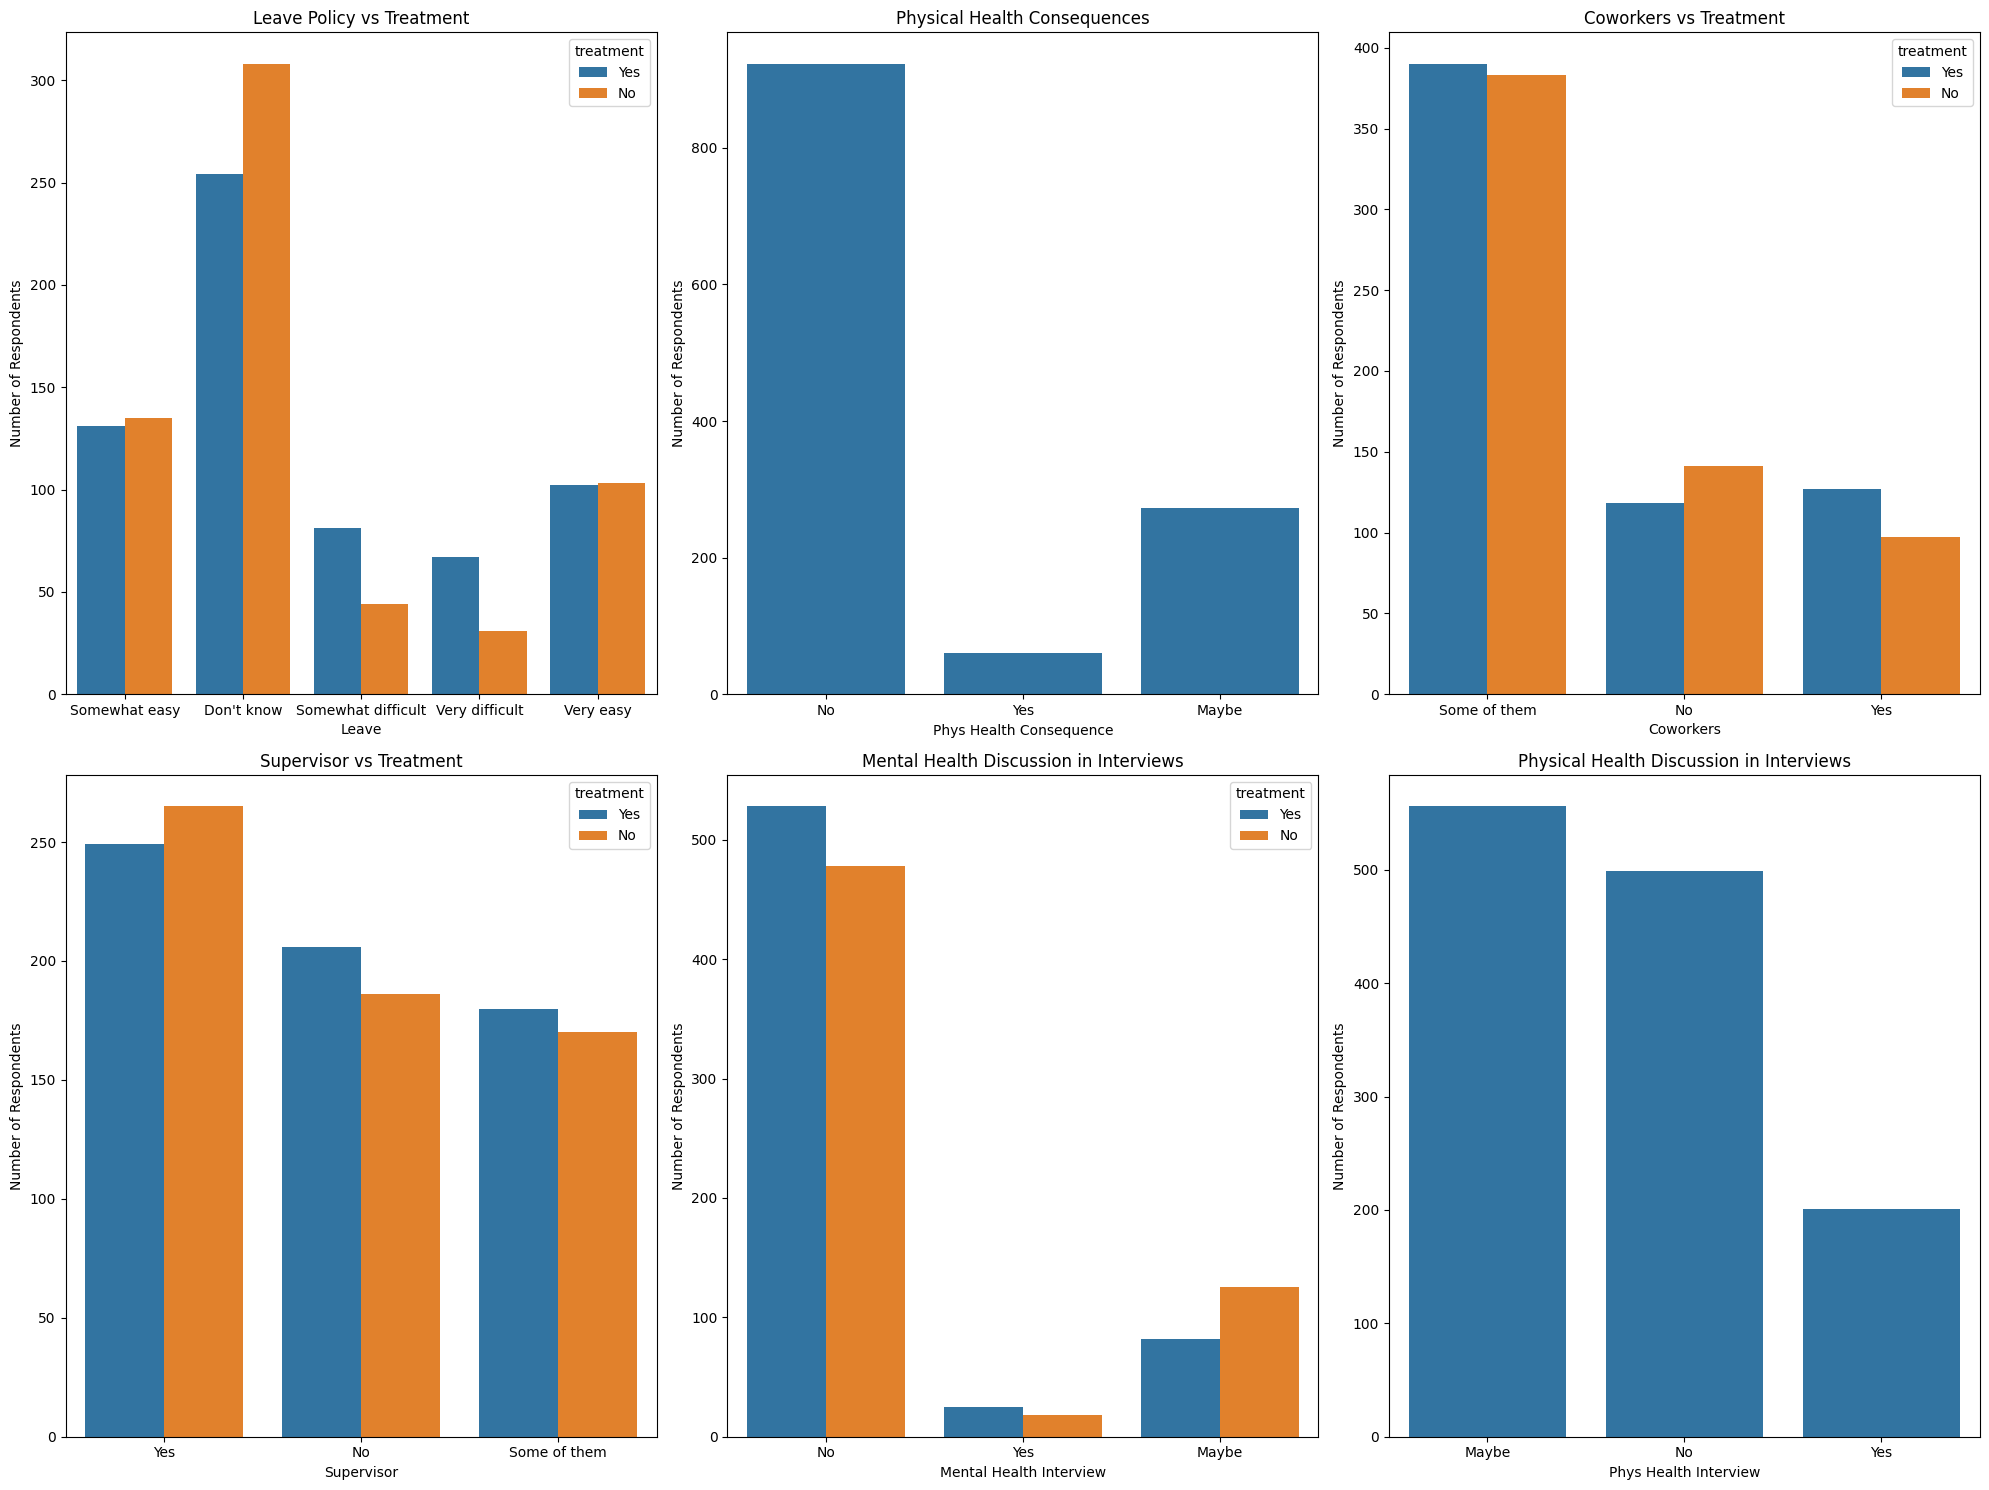

In [57]:
# Analyze the impact of workplace openness, policies, and perceptions on mental health treatment
plt.figure(figsize=(20, 15))

features = [
    ("leave", "Leave Policy vs Treatment"),
    ("phys_health_consequence", "Physical Health Consequences"),
    ("coworkers", "Coworkers vs Treatment"),
    ("supervisor", "Supervisor vs Treatment"),
    ("mental_health_interview", "Mental Health Discussion in Interviews"),
    ("phys_health_interview", "Physical Health Discussion in Interviews")
]

for i, (feature, title) in enumerate(features, 1):
    plt.subplot(2, 3, i)

    if feature in ["phys_health_consequence", "phys_health_interview"]:
        sns.countplot(data=survey_df, x=feature)
    else:
        sns.countplot(data=survey_df, x=feature, hue="treatment")

    plt.title(title)
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel("Number of Respondents")

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze the relationship between key workplace
interaction and policy-related features—**leave, coworkers,
phys_health_consequence, supervisor, mental_health_interview, and
phys_health_interview**—and respondents’ attitudes toward mental health
treatment. These categorical variables help evaluate how workplace support,
openness, and perceived consequences influence employees’ willingness to
discuss and seek help for mental health concerns.


##### 2. What is/are the insight(s) found from the chart?

**Insights**

- A majority of respondents are **uncertain about the process of taking medical
  leave for mental health conditions**, indicating a lack of awareness and
  limited organizational communication regarding mental health leave policies.
- Most respondents believe that **discussing physical health issues with their
  employer would not lead to negative consequences**, which reflects a generally
  positive and supportive workplace environment for physical health concerns.
- Only a smaller proportion of respondents are willing to **share mental health
  issues with coworkers**, possibly due to fear of judgment or stigma, suggesting
  gaps in peer-level trust within the workplace.
- A majority of respondents are **comfortable discussing mental health concerns
  with their direct supervisors**, which is a positive indicator of professional
  relationships and managerial support.
- Most respondents reported that they **would not discuss mental health issues
  with a potential employer during a job interview**, highlighting concerns
  related to stigma, discrimination, or negative career impact.
- Similarly, many respondents stated that they **would not or might hesitate to
  discuss physical health issues during job interviews**, reflecting broader
  concerns about disclosure and perceived professional risks.

Overall, these findings suggest that while internal workplace support—especially
from supervisors—appears relatively strong, concerns around stigma and
disclosure remain prominent, particularly in hiring and peer-level contexts.


##### 3. Will the gained insights help creating a positive business impact?

These insights highlight existing gaps in **awareness, trust, and communication**
related to health discussions in the workplace. Unclear policies and fear of
disclosure can discourage employees from seeking timely support.

By clearly defining **medical leave procedures**, strengthening **supervisor
support**, and actively reducing **stigma around health disclosures**,
organizations can build greater employee trust, encourage early intervention,
and minimize productivity loss.

Such initiatives contribute to a **healthier workplace culture**, reduced
absenteeism, improved employee retention, and stronger long-term organizational
performance.


#### Chart - 14 - Correlation Heatmap

In [58]:
# Encode categorical features using Label Encoding for correlation analysis
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_df = survey_df.copy()

for col in categorical_cols:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])


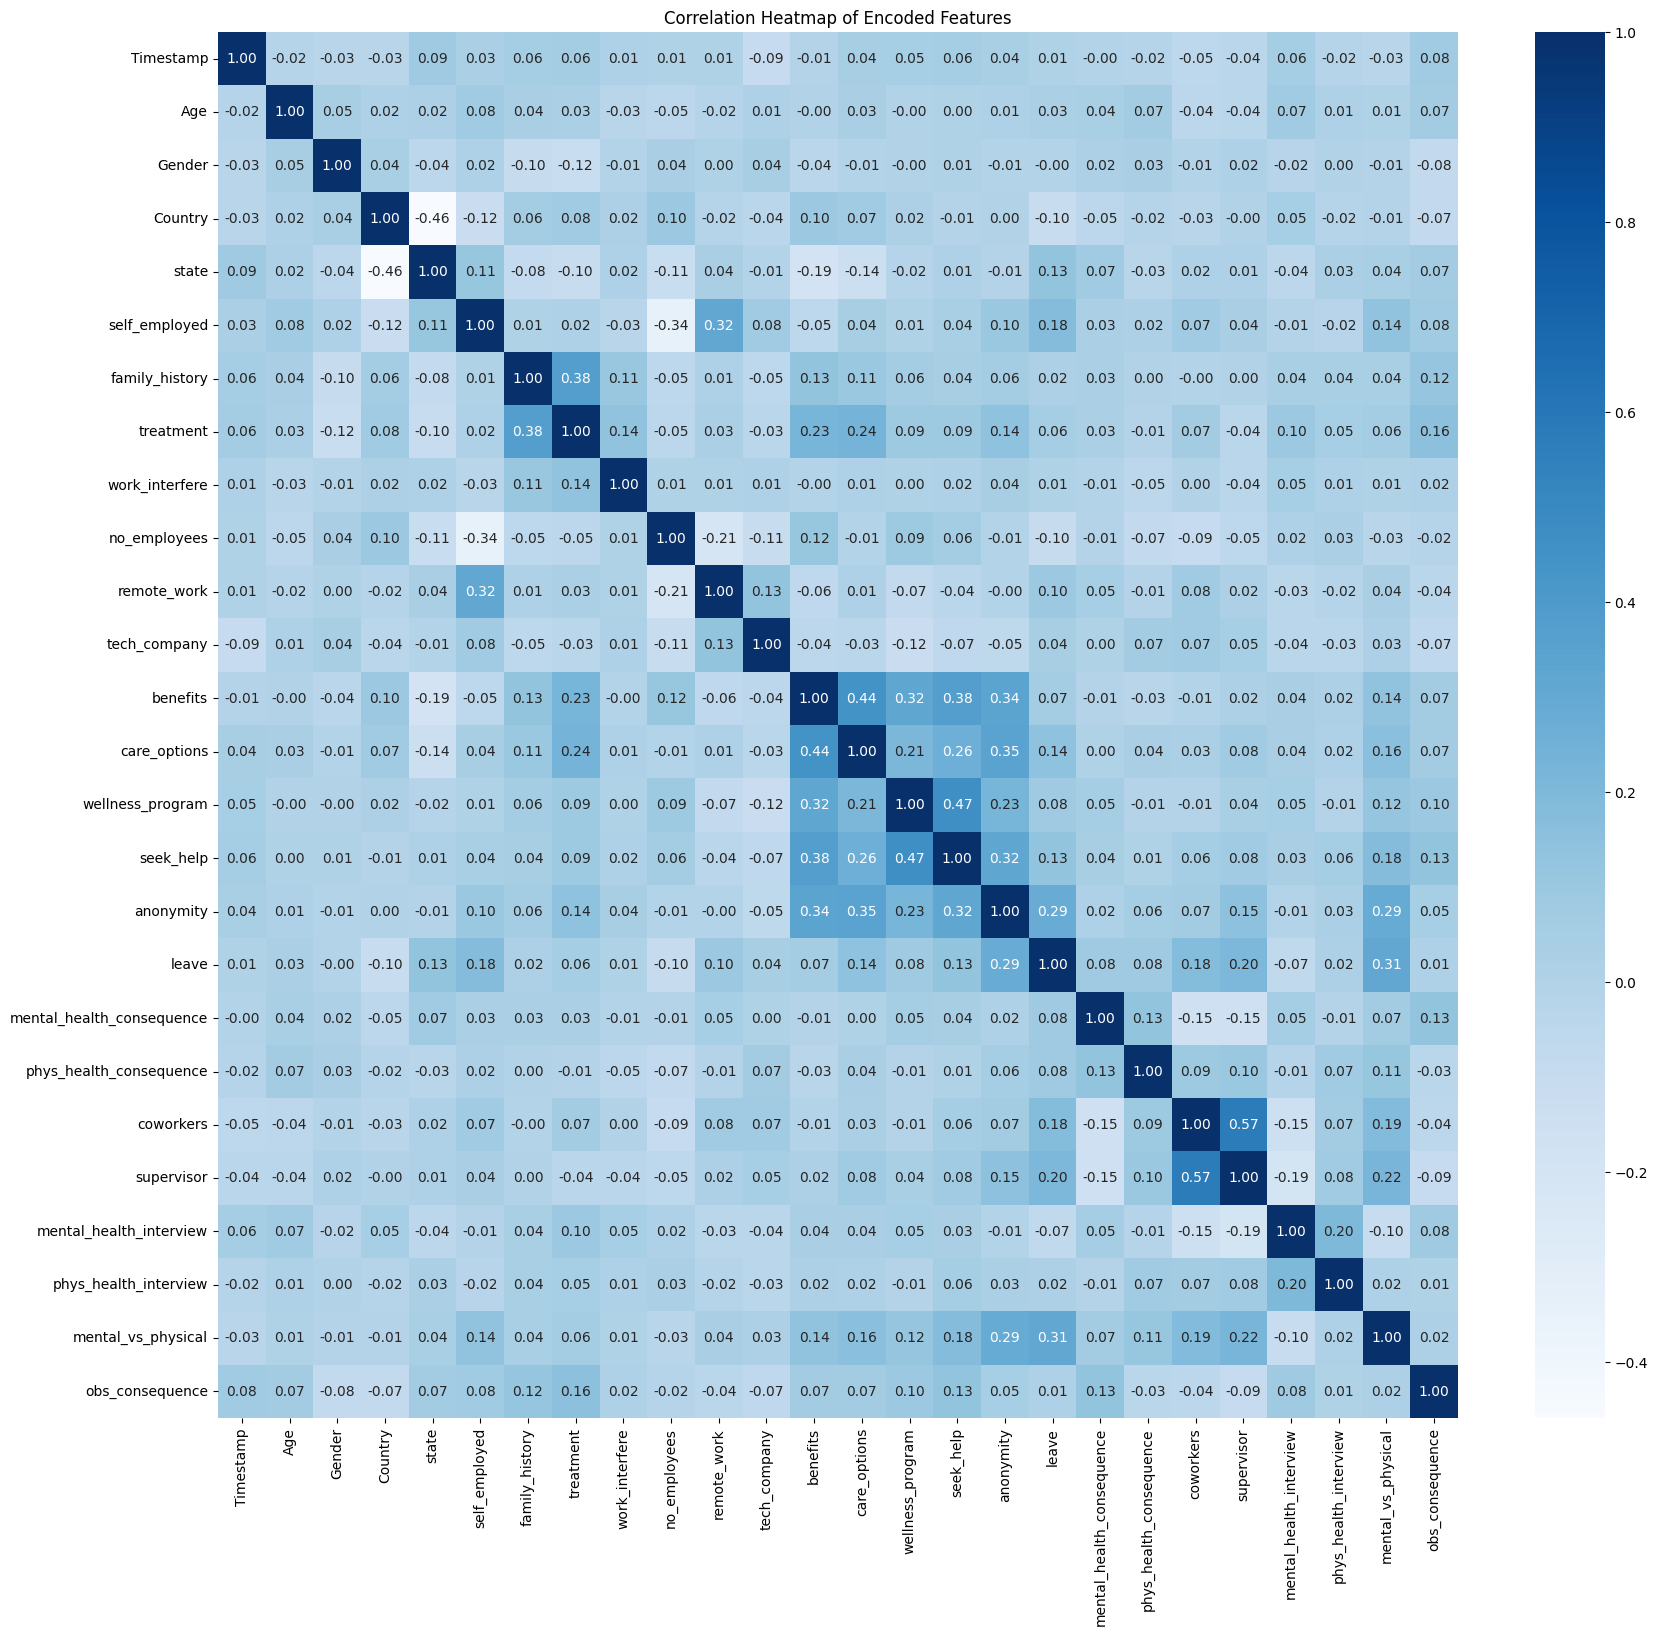

In [59]:
# Plot correlation heatmap for encoded numerical features
plt.figure(figsize=(20, 18))

correlation_matrix = encoded_df.corr(numeric_only=True)

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="Blues",
    fmt=".2f"
)

plt.title("Correlation Heatmap of Encoded Features")
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze the **correlation between different features**
of the survey. The correlation heatmap helps identify relationships and
associations among variables, making it easier to understand how workplace
factors, mental health indicators, and treatment-related features are related
to one another.


##### 2. What is/are the insight(s) found from the chart?

The correlation analysis indicates that the **categorical features do not show
strong correlations with one another**, suggesting that these variables are
largely independent and capture different aspects of the survey data.


##### 3. Will the gained insights help creating a positive business impact?

**Business Insights**

- Since the correlation heatmap shows **no strong correlations among the
  categorical features**, it indicates that mental health outcomes in the
  workplace are **not driven by a single factor**.
- This highlights the need for organizations to adopt a **holistic and
  multi-policy approach** toward mental health, rather than relying on only one
  initiative such as benefits, anonymity, or awareness programs.
- Independent factors like workplace culture, managerial support, awareness,
  and perceived consequences must be addressed **simultaneously** to improve
  mental health treatment adoption.
- Businesses that design **integrated mental health strategies** covering
  policy clarity, trust, communication, and support systems are more likely to
  achieve improved employee well-being, higher productivity, and long-term
  organizational growth.


#### Chart - 15 - Pair Plot

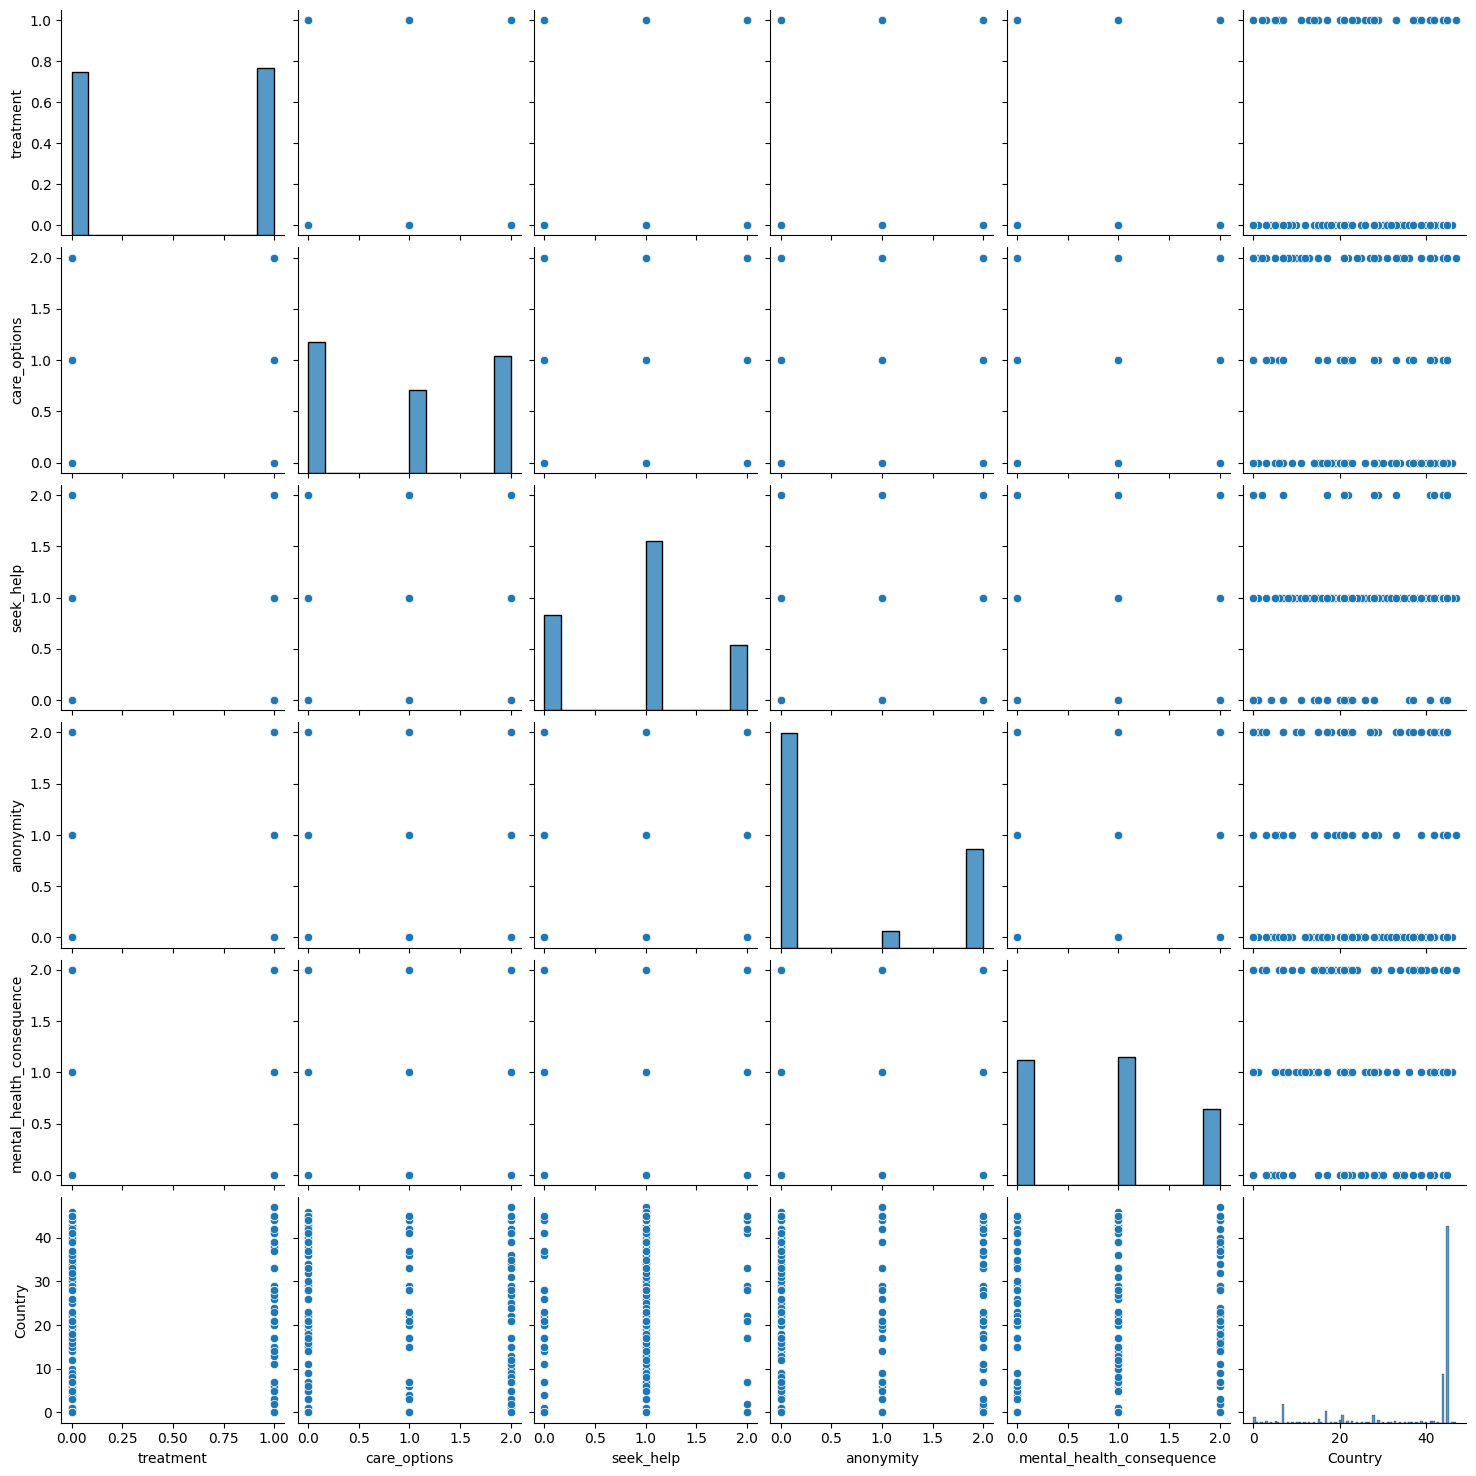

In [60]:
# Visualize pairwise relationships among selected encoded features
sns.pairplot(
    encoded_df[[
        "treatment",
        "care_options",
        "seek_help",
        "anonymity",
        "mental_health_consequence",
        "Country"
    ]]
)
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze the **pairwise relationships among selected
categorical features**. The pair plot helps visualize how these variables
interact with each other and provides additional insight into patterns related
to mental health awareness, support, and treatment-seeking behavior.


##### 2. What is/are the insight(s) found from the chart?

**Insights**

- The pair plot shows that there are **no strong linear relationships** among
  the selected categorical features such as **treatment, care_options,
  seek_help, anonymity, mental_health_consequence, and Country**.
- This indicates that these variables capture **different and independent
  aspects** of mental health awareness, organizational support, and employee
  behavior.
- The lack of strong correlations suggests that **treatment-seeking behavior
  is influenced by multiple factors**, rather than a single dominant variable.
- Organizational policies like care options, anonymity, and help-seeking
  resources impact employees in **complex and varied ways**, rather than
  following a simple pattern.


##### 3. Will the gained insights help creating a positive business impact?

**Business Insights**

- Since no single feature strongly drives treatment-seeking behavior,
  organizations should adopt a **multi-dimensional mental health strategy**
  rather than relying on one policy or initiative.
- Companies should simultaneously focus on **improving awareness, ensuring
  confidentiality, providing support resources, and reducing stigma** to
  encourage employees to seek help.
- Tailored mental health programs that address **multiple workplace factors**
  are more likely to be effective than one-size-fits-all solutions.
- By addressing these factors holistically, organizations can improve employee
  well-being, increase trust, and achieve **long-term productivity and business
  growth**.


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

### **1. Build a clear and accessible mental health support system**

Organizations should move from informal or ad-hoc support to a **structured
mental health framework**. This includes:

- Providing or upgrading health plans to cover **therapy, counseling, and
  psychiatric care**, not just physical health.
- Offering an **Employee Assistance Program (EAP)** or confidential support
  helpline.
- Creating a **single internal portal** that clearly explains available mental
  health resources, eligibility, and usage steps.

Employees who can easily access mental health care are less likely to experience
burnout or disengagement, which reduces hiring costs and improves retention.

---

### **2. Reduce stigma and protect employees who seek help**

Fear of negative consequences is a major barrier to treatment-seeking. To
address this, companies should:

- Clearly communicate that **seeking mental health support will not affect job
  security, promotions, or compensation**.
- Provide **anonymous feedback and reporting mechanisms** for employees.
- Encourage leadership to openly support mental health discussions and normalize
  the topic.

Reducing stigma builds psychological safety, leading to higher engagement and
better team performance.

---

### **3. Equip managers as first-line support**

Managers often observe early signs of mental health issues but may lack the
skills to respond. Organizations should:

- Provide **basic mental health and empathy training** for managers.
- Offer **guidelines and scripts** on how to have supportive conversations.
- Include employee well-being as part of **manager performance metrics**.

This improves trust, reduces mishandled situations, and prevents team burnout.

---

### **4. Treat mental health on par with physical health**

Mental health should not be treated as optional or secondary. Companies should:

- Align **mental health leave policies** with physical health leave policies.
- Include mental health topics in **wellness programs and company updates**.
- Track **mental and physical health metrics together** in people analytics.

This reinforces that mental health is business-critical and improves long-term
productivity.

---

### **5. Actively manage workload and work culture**

High pressure and long working hours contribute to mental strain. Organizations
should:

- Conduct **regular workload and capacity reviews**.
- Set clear expectations around **work hours and availability**.
- Monitor overwork patterns and intervene through staffing or reprioritization.

Managing workload proactively leads to sustainable productivity and reduces
burnout-related performance loss.

---

### **6. Continuously measure and improve mental health initiatives**

Mental health strategies should evolve continuously. Companies should:

- Run **anonymous pulse surveys** to track stress and burnout.
- Analyze results by **team, role, and company size**.
- Use insights to update policies and leadership actions.

Continuous measurement helps organizations identify risks early and maintain a
healthy workplace.

---

### **Overall Outcome**

By implementing these solutions, organizations can create a supportive,
trust-based work culture that encourages early mental health intervention,
improves employee well-being, and drives **sustainable long-term business
growth**.

# **Conclusion**

## **Overall Conclusion**

The analysis of the **Mental Health in Tech Survey** reveals several important
insights into the current state of mental health awareness, support, and
challenges within the technology sector.

**Prevalence of Mental Health Issues:**  
The survey indicates that mental health concerns are **common among tech
professionals**. However, a significant number of individuals remain hesitant
to seek help or openly discuss their mental health conditions in the workplace.
This highlights the need for increased awareness and encouragement for
employees to prioritize their mental well-being.

**Inconsistent Organizational Support:**  
While some organizations offer mental health benefits and resources, the level
of **communication, accessibility, and acceptance** of these resources varies
widely. Many employees are either unaware of the available support or feel that
using such benefits is not culturally encouraged, emphasizing the need for
better promotion and clarity of mental health initiatives.

**Stigma and Fear of Career Impact:**  
Stigma continues to be a major barrier to mental health disclosure. Employees
often fear that sharing mental health concerns may negatively affect their
career progression, job security, or professional reputation. This reinforces
the importance of building a workplace culture that **normalizes mental health
discussions** and actively works to eliminate stigma.

**Impact of Company Size and Workplace Culture:**  
The findings suggest that **larger organizations** are more likely to have
formal mental health policies and structured benefits in place. In contrast,
smaller organizations may demonstrate a more open culture but often lack
systematic support mechanisms. This shows that both company size and workplace
culture significantly influence how mental health is addressed.

**Inequality Between Mental and Physical Health:**  
A recurring insight from the analysis is the perception that **mental health is
not treated with the same seriousness as physical health**. Employees often
feel that mental health issues receive less visibility, policy support, and
organizational priority. This disparity highlights the urgent need for
organizations to place mental health on equal footing with physical health.

### **Final Takeaway**

Overall, the analysis underscores the importance of adopting a **holistic,
transparent, and stigma-free approach** to mental health in the tech industry.
By improving awareness, strengthening support systems, and fostering a culture
of trust, organizations can enhance employee well-being, improve productivity,
and achieve sustainable long-term growth.
